# Analyse exploratoire des données

In [463]:
# Importation des librairies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
warnings.filterwarnings('ignore')
import itertools
from sklearn.cluster import KMeans
%pylab inline
%matplotlib inline

# Lecture et importation du dossier input des datas
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Populating the interactive namespace from numpy and matplotlib
/kaggle/input/foodfacts/._fr.openfoodfacts.org.products.csv
/kaggle/input/openfood/datas_cleaned.parquet.gzip
/kaggle/input/openfoodfacts/fr.openfoodfacts.org.products.csv


In [464]:
datas_cleaned = pd.read_parquet('/kaggle/input/openfood/datas_cleaned.parquet.gzip') 

# Analyse univariée

In [465]:
datas_cleaned = datas_cleaned.copy()

In [466]:
datas_cleaned.head(5)

product_name               quantity  \
20776  Tomates jaunes entières pelées au jus  400 g (240 g égoutté)   
20832            Tomates pelées au jus - BIO  400 g (240 g égoutté)   
20834                   Pulpe de tomates bio              2 * 400 g   
27150                Cramberry Classic Light                  500 g   
36080          Diet Sparkling Florida Orange               500 ml e   

                packaging_tags  \
20776                 conserve   
20832  conserve,boite-en-metal   
20834                conserves   
27150         sachet,plastique   
36080      bouteille,plastique   

                                           categories_fr nutrition_grade_fr  \
20776  Aliments et boissons à base de végétaux,Alimen...                  a   
20832  Aliments et boissons à base de végétaux,Alimen...                  a   
20834  Aliments et boissons à base de végétaux,Alimen...                  a   
27150                      Boissons,Boissons non sucrées                  c   
36080  Aliments et boissons à base de végétaux,Boisso...                  c   

               pnns_groups_1          pnns_groups_2  main_category_fr  \
20776  fruits and vegetables             Vegetables         Conserves   
20832  fruits and vegetables             Vegetables         Conserves   
20834  fruits and vegetables             Vegetables         Conserves   
27150              beverages  Non-sugared beverages          Boissons   
36080              beverages    Sweetened beverages  Sodas aux fruits   

       carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776               0.030    0.050000                        0.750   
20832               0.034    0.044444                        0.220   
20834               0.030    0.044444                        0.750   
27150               0.015    0.000111                        0.000   
36080               0.008    0.005556                        0.142   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
20776         0.88            0.000000        0.000       0.043636   0.005556   
20832         0.21            0.000000        0.031       0.043636   0.005556   
20834         0.80            0.000000        0.030       0.040000   0.007222   
27150         0.42            0.000000        0.015       0.000000   0.002222   
36080         0.29            0.004167        0.008       0.003636   0.002778   

       sodium_100g  nutrition-score-fr_100g  
20776     0.005556                 0.161290  
20832     0.005556                 0.161290  
20834     0.007222                 0.161290  
27150     0.002222                 0.451613  
36080     0.002778                 0.419355

In [467]:
datas_cleaned.describe()

carbohydrates_100g   fiber_100g  fruits-vegetables-nuts_100g  \
count         1764.000000  1764.000000                  1764.000000   
mean             0.047711     0.049679                     0.334434   
std              0.112151     0.058653                     0.294897   
min              0.000000     0.000000                     0.000000   
25%              0.005000     0.000000                     0.020000   
50%              0.020000     0.038500                     0.338800   
75%              0.037655     0.084444                     0.600000   
max              1.000000     1.000000                     1.000000   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  \
count  1764.000000         1764.000000  1764.000000    1764.000000   
mean      0.549281            0.026062     0.052775       0.038529   
std       0.334774            0.103354     0.131111       0.071224   
min       0.000000            0.000000     0.000000       0.000000   
25%       0.170000            0.000000     0.003000       0.000838   
50%       0.640000            0.000000     0.010000       0.021818   
75%       0.820000            0.004167     0.030000       0.047273   
max       1.000000            1.000000     1.000000       1.000000   

         salt_100g  sodium_100g  nutrition-score-fr_100g  
count  1764.000000  1764.000000              1764.000000  
mean      0.022470     0.022490                 0.368305  
std       0.050534     0.050530                 0.138893  
min       0.000000     0.000000                 0.000000  
25%       0.000556     0.000556                 0.258065  
50%       0.005188     0.005299                 0.387097  
75%       0.033648     0.033648                 0.438710  
max       1.000000     1.000000                 1.000000

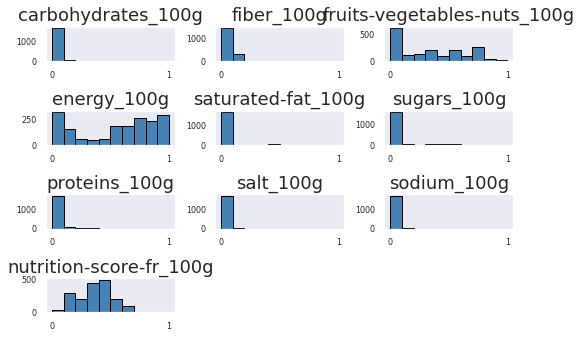

In [468]:
datas_cleaned.hist(color='steelblue', edgecolor='black', linewidth=1.0,
                   xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2));

In [469]:
numeric_data = datas_cleaned.select_dtypes(include=[np.number])
categorical_data = datas_cleaned.select_dtypes(exclude=[np.number])

numeric_data.shape[1]
categorical_data.shape[1]

8

In [470]:
Knn_imputed=datas_cleaned[["carbohydrates_100g", "fiber_100g", "fruits-vegetables-nuts_100g","energy_100g", "saturated-fat_100g","sugars_100g", "proteins_100g","salt_100g", "sodium_100g", "nutrition-score-fr_100g"]]

In [599]:
from pylab import *
import numpy as np
import matplotlib.pyplot as ptl

# fig, axes = plt.subplots(nrows = 5, ncols = 2)
# Histogram

def Histogram():
    fig, ax = plt.subplots(2,5,figsize=(25,10))
    for idx, (name_feature, df_feature) in enumerate(Knn_imputed.groupby(level=0,axis=1)):
        df=numeric_data[name_feature]
        ax[idx//5,idx%5].set_title(name_feature, fontsize=14)
        ax[idx//5,idx%5].set_ylabel("Frequency")
        ax[idx//5,idx%5].set_xlabel("Normalized Feature")
        feature_hist=np.histogram(numeric_data[name_feature],bins=15)
        ax[idx//5,idx%5].bar(feature_hist[1][:-1],feature_hist[0],align='edge',width=0.8*(feature_hist[1][1]-feature_hist[1][0]),edgecolor='black', linewidth=1,color='steelblue')
        ax[idx//5,idx%5].text(feature_hist[1][-1],np.max(feature_hist[0])*1.13,r'$\mu$='+str(round(numeric_data[name_feature].mean(),2)), horizontalalignment='right',verticalalignment='top', fontsize=12)
        ax[idx//5,idx%5].set_ylim([0,np.max(feature_hist[0])*1.2])

        fig.tight_layout()

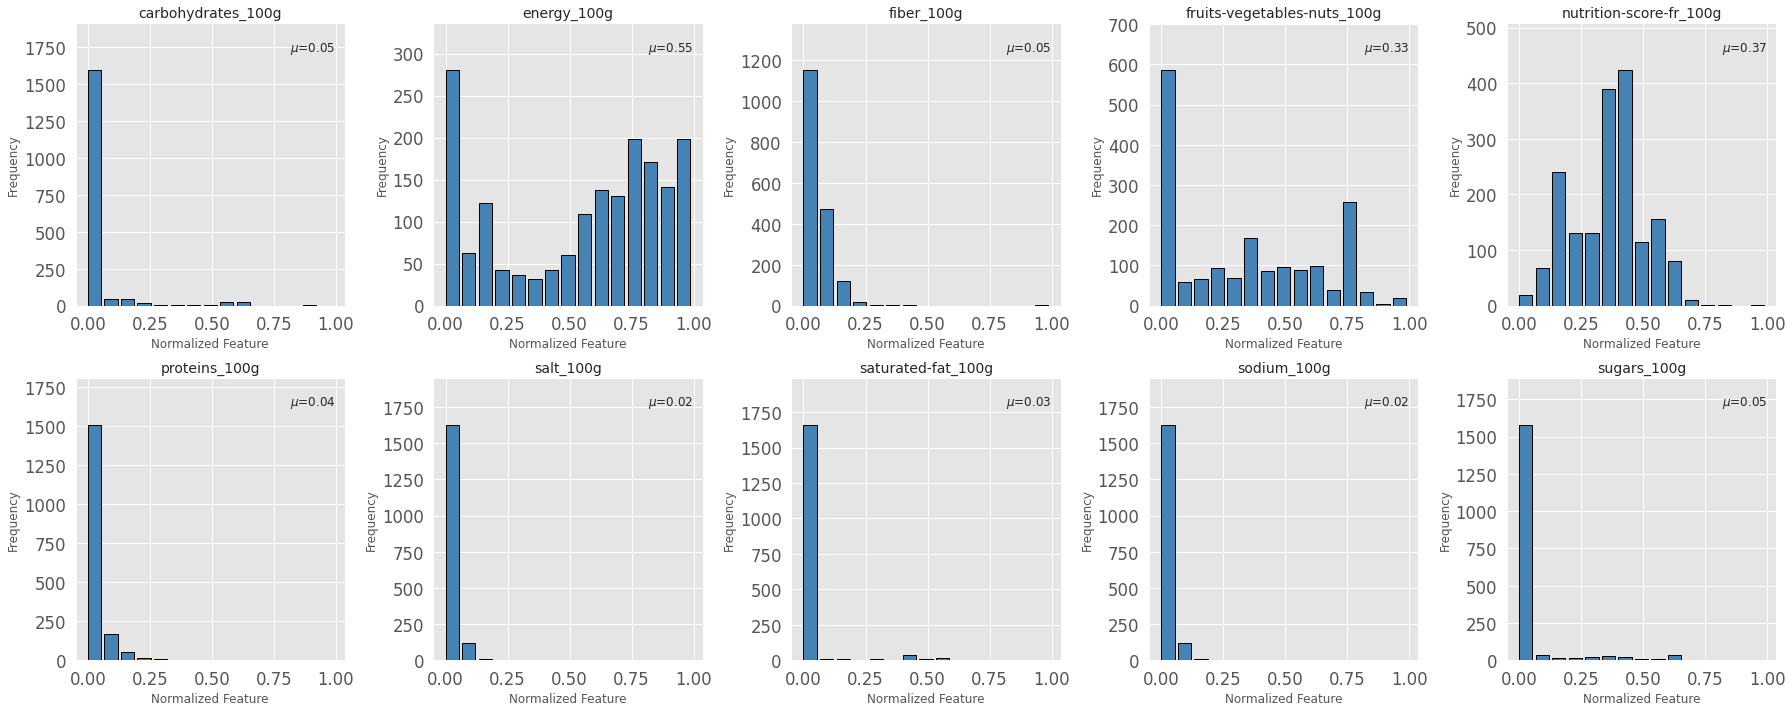

In [600]:
Histogram()

In [473]:
numeric_data.columns

Index(['carbohydrates_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g',
       'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [474]:
from pylab import *
import numpy as np

#  Categorical Data
ser = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

#  Categorical Data
a = len(ser)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

# Histogram
fig = plt.figure(figsize = (30, 30))
for i in ser:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.histplot(data=Knn_imputed, x=i)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.boxplot(x = Knn_imputed[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = Knn_imputed, x = i, y = 'saturated-fat_100g', hue = 'nutrition-score-fr_100g')
    c = c + 1

plt.tight_layout()
plt.show()

In [475]:
# Histogram
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15,5))
fig.suptitle ("Visualisation de données numériques continues unidimensionnelles", fontsize=14)

# fig.subplots_adjust(top=0.85, wspace=0.3)

# ax = fig.add_subplot(1,1, 1)
axes[0].set_xlabel("nutrition-score-fr_100g")
axes[0].set_ylabel("Frequency") 
axes[0].text(1.2, 800, r'$\mu$='+str(round(numeric_data['nutrition-score-fr_100g'].mean(),2)),horizontalalignment='right',verticalalignment='top', 
         fontsize=12)
sns.histplot(data=numeric_data.sort_values('nutrition-score-fr_100g'), x='nutrition-score-fr_100g', ax=axes[0], bins=15)
                                    

# Density Plot
# title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
# fig.subplots_adjust(top=0.85, wspace=0.3)

# ax1 = fig.add_subplot(1,1, 1)
axes[1].set_xlabel("nutrition-score-fr_100g")
axes[1].set_ylabel("Density") 
sns.kdeplot(data=numeric_data['nutrition-score-fr_100g'], ax=axes[1], color='steelblue', shade=True);

In [476]:
# Density Plot


def Density_Plot():
    fig, ax = plt.subplots(2,5,figsize = (25,10))
    for idx, (name_feature, df_feature) in enumerate(numeric_data.groupby(level=0,axis=1)):
    #fig.subplots_adjust(top=0.85, wspace=0.3)

        ax1=ax[idx//5,idx%5]
        ax1.set_title(name_feature)
        ax1.set_ylabel("Density")
        sns.kdeplot(np.array(numeric_data[name_feature]), ax=ax1, shade=True, color='steelblue')

    fig.tight_layout()
    plt.show()



In [477]:
Density_Plot()

In [478]:
#BoxPlot
def BoxPlot():
    fig, ax = plt.subplots(2,5,figsize = (25,10))
    for idx, (name_feature, df_feature) in enumerate(numeric_data.groupby(level=0,axis=1)):
        
        ax1=ax[idx//5,idx%5]
        ax1.set_title(name_feature, fontsize=14);
        ax1.set_ylabel("Frequency")
        ax1.boxplot(df_feature)
    plt.show()


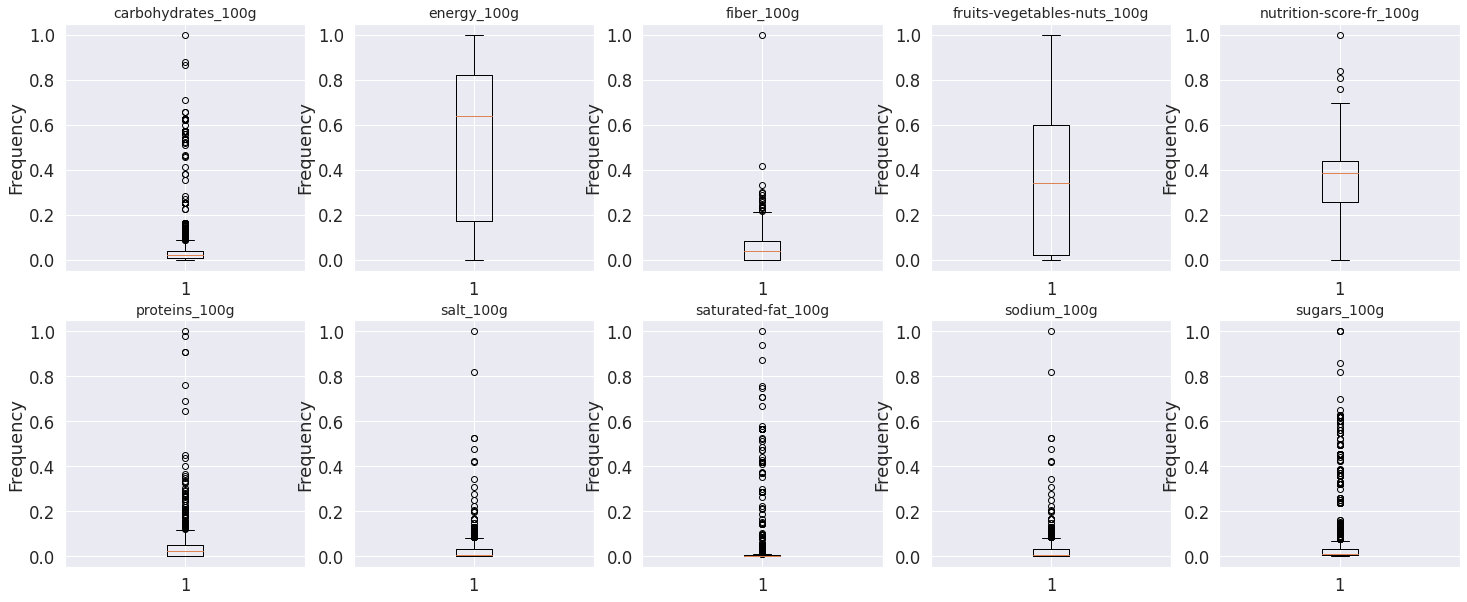

In [479]:
BoxPlot()

### Categorical Features

In [480]:
categorical_data.describe()

product_name quantity    packaging_tags  \
count                             1764     1764              1764   
unique                            1523      588               427   
top     Tomates entières pelées au jus    500 g  sachet,plastique   
freq                                16      169               245   

                                            categories_fr nutrition_grade_fr  \
count                                                1764               1764   
unique                                                623                  5   
top     Aliments et boissons à base de végétaux,Alimen...                  d   
freq                                                   45                593   

       pnns_groups_1 pnns_groups_2 main_category_fr  
count           1764          1764             1764  
unique             9            26               74  
top        beverages    Vegetables         Boissons  
freq             865           570              312

La hauteur peut représenter n'importe quoi, tant qu'il s'agit d'un nombre. Et chaque barre peut représenter n'importe quoi, tant qu'il s'agit d'une catégorie.

In [481]:
# Bar Plot
def BarPlot():
    fig, ax = plt.subplots(2,4,figsize = (25,13))
    for idx, (col, impute_cols) in enumerate(categorical_data.groupby(level=0,axis=1)):
        # title = fig.suptitle("Wine Quality Frequency", fontsize=14)

        ax1=ax[idx//4,idx%4]
        ax1.set_title(col)
        ax1.set_ylabel("Frequency") 
        w_q = categorical_data[col].value_counts().head(10)
        w_q = (list(w_q.index), list(w_q.values))
        ax1.tick_params(axis='both', which='major', labelsize=8.5)
        ax1.set_xticklabels([i if len(i)<=15 else i[:12] + '...' for i in categorical_data[col].value_counts().head(10).index], rotation = 90, size=14)
        bar = ax1.bar(w_q[0], w_q[1], color='steelblue', 
                edgecolor='black', linewidth=1)
    fig.tight_layout(h_pad=3)
    plt.show()

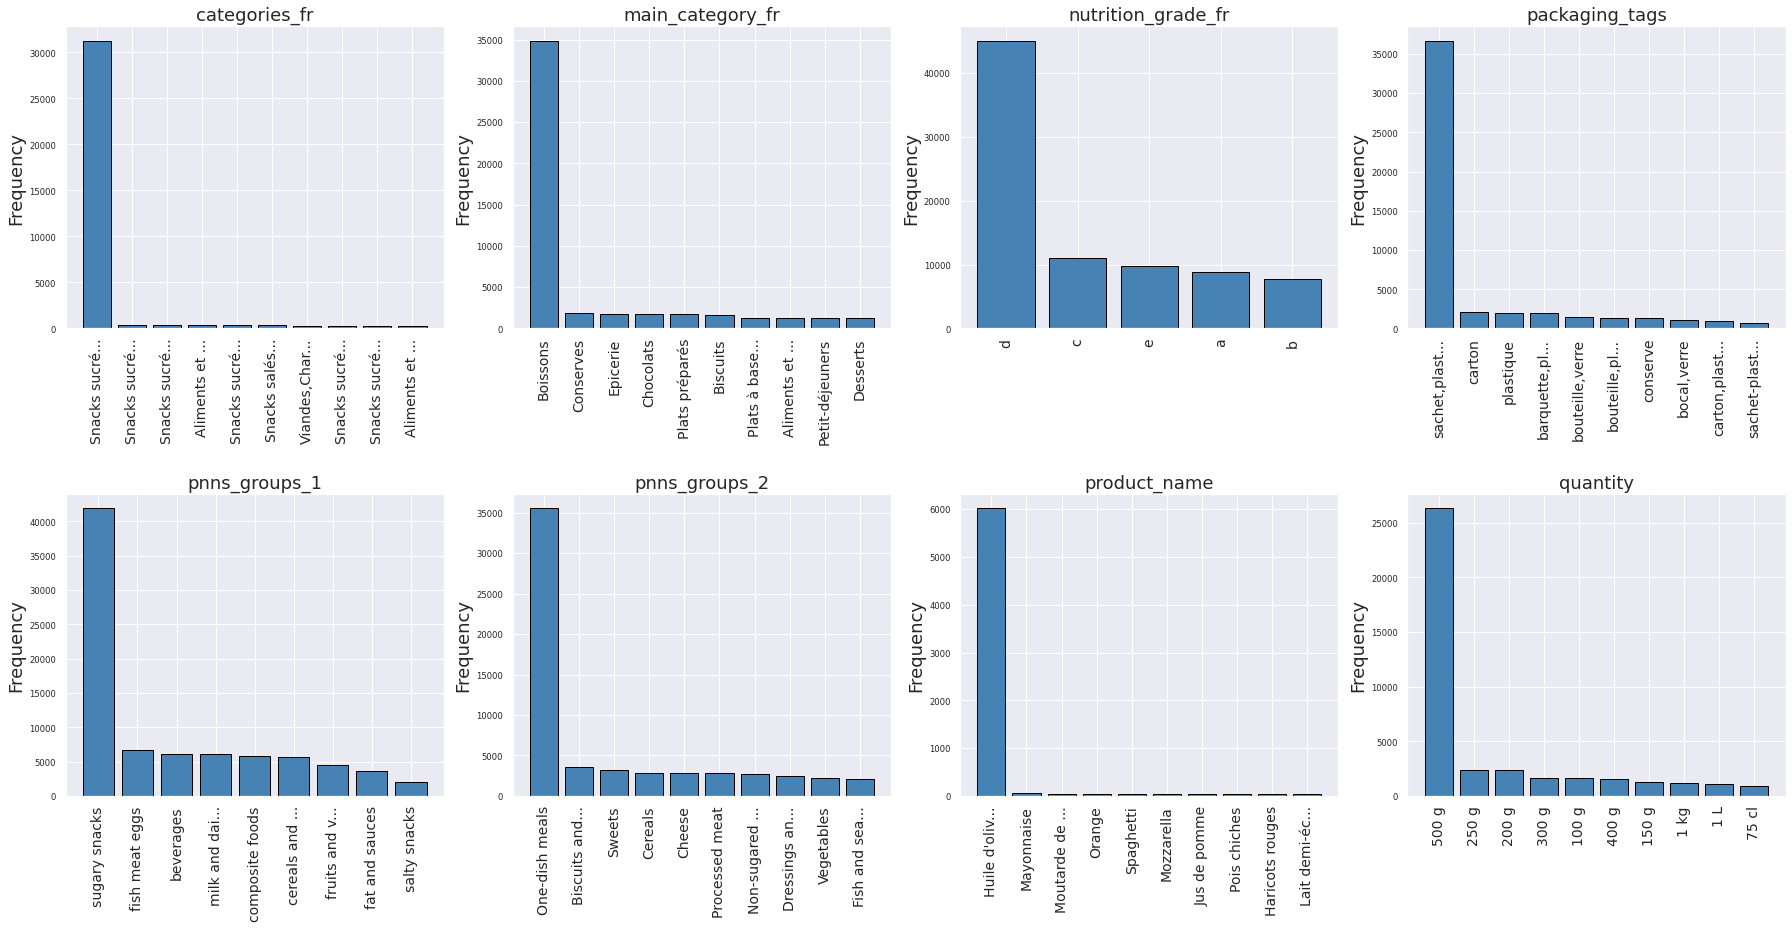

In [482]:
BarPlot()

In [483]:
categorical_data.head(2)

product_name               quantity  \
20776  Tomates jaunes entières pelées au jus  400 g (240 g égoutté)   
20832            Tomates pelées au jus - BIO  400 g (240 g égoutté)   

                packaging_tags  \
20776                 conserve   
20832  conserve,boite-en-metal   

                                           categories_fr nutrition_grade_fr  \
20776  Aliments et boissons à base de végétaux,Alimen...                  a   
20832  Aliments et boissons à base de végétaux,Alimen...                  a   

               pnns_groups_1 pnns_groups_2 main_category_fr  
20776  fruits and vegetables    Vegetables        Conserves  
20832  fruits and vegetables    Vegetables        Conserves

In [484]:
categorical_data.groupby(["pnns_groups_1"]).count()

product_name  quantity  packaging_tags  \
pnns_groups_1                                                     
beverages                         865       865             865   
cereals and potatoes               30        30              30   
composite foods                    70        70              70   
fat and sauces                     46        46              46   
fish meat eggs                      5         5               5   
fruits and vegetables             608       608             608   
milk and dairy products            22        22              22   
salty snacks                        7         7               7   
sugary snacks                     111       111             111   

                         categories_fr  nutrition_grade_fr  pnns_groups_2  \
pnns_groups_1                                                               
beverages                          865                 865            865   
cereals and potatoes                30                  30             30   
composite foods                     70                  70             70   
fat and sauces                      46                  46             46   
fish meat eggs                       5                   5              5   
fruits and vegetables              608                 608            608   
milk and dairy products             22                  22             22   
salty snacks                         7                   7              7   
sugary snacks                      111                 111            111   

                         main_category_fr  
pnns_groups_1                              
beverages                             865  
cereals and potatoes                   30  
composite foods                        70  
fat and sauces                         46  
fish meat eggs                          5  
fruits and vegetables                 608  
milk and dairy products                22  
salty snacks                            7  
sugary snacks                         111

<AxesSubplot:ylabel='pnns_groups_1'>

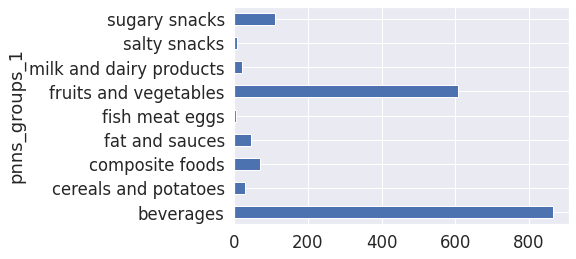

In [485]:
# We can make this into a horizontal bar graph to make this a little easier to read.
categorical_data.groupby(['pnns_groups_1'])['product_name'].count().plot(kind='barh')

# That last line produces a messy bar graph with hundreds of publishers.  
# We can use iloc or head mehthods to limit the number shown
# df_features_obj2.groupby(['pnns_groups_1'])['product_name'].count().head(10).plot(kind='barh') 

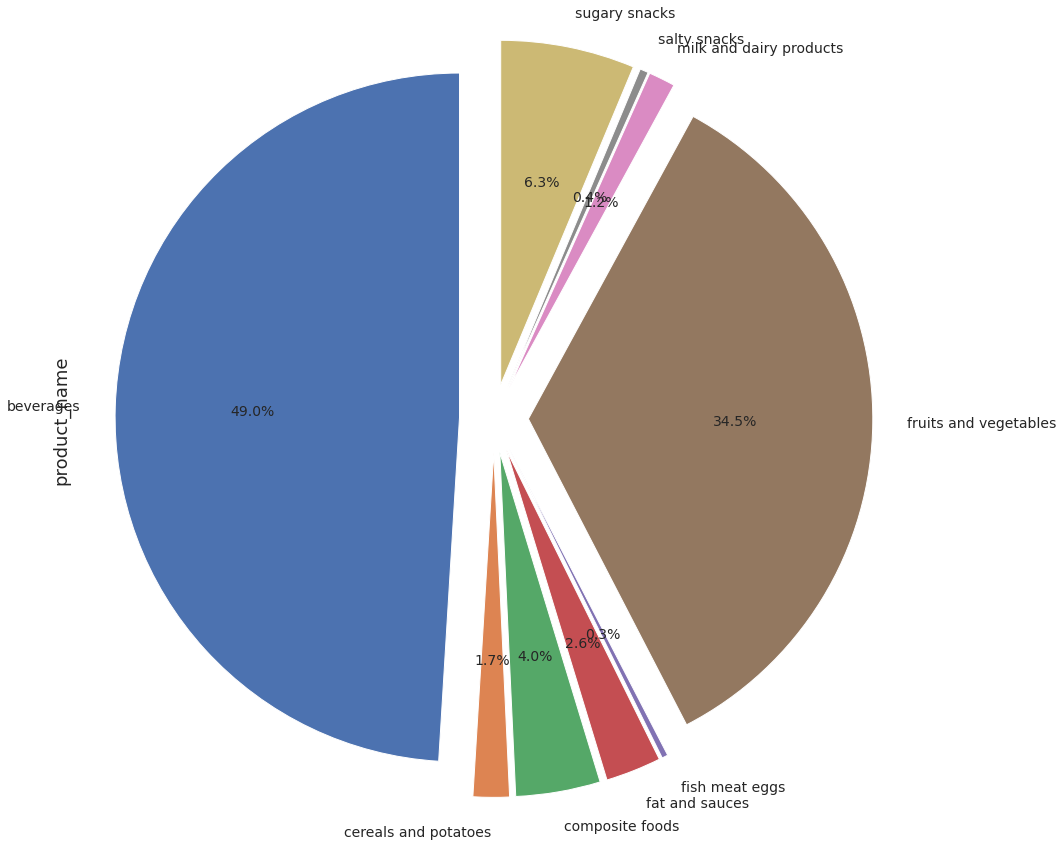

In [486]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def label_function(val):
    return f'{val / 100 * len(categorical_data):.0f}\n{val:.0f}%'

# df_features_obj2.groupby(['pnns_groups_1'])['product_name'].count()


explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(15,15))

categorical_data.groupby(['pnns_groups_1'])['product_name'].size().head(10).plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 14},
                                ax=ax1, explode=explode, startangle=90)

ax1.axis('equal')

plt.show()

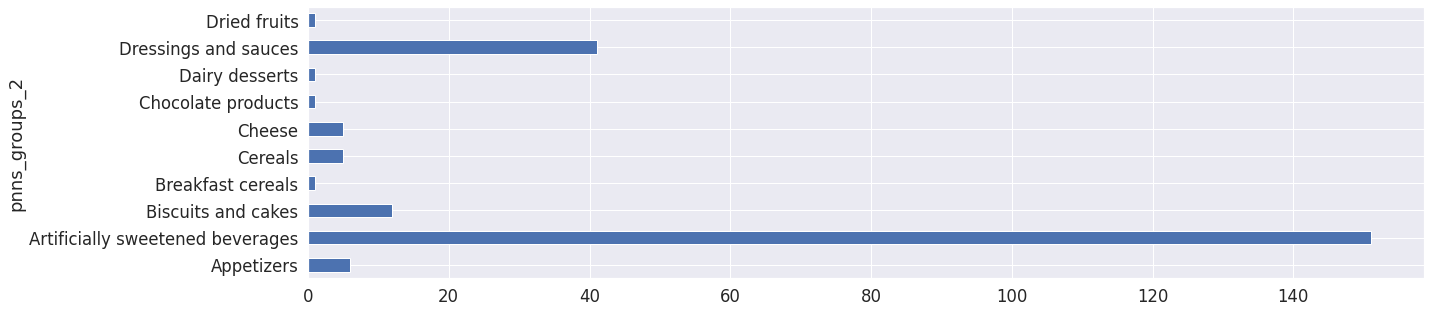

In [487]:
fig = plt.figure(figsize=(20,5))
categorical_data.groupby(['pnns_groups_2'])['product_name'].count().head(10).plot(kind='barh'); 

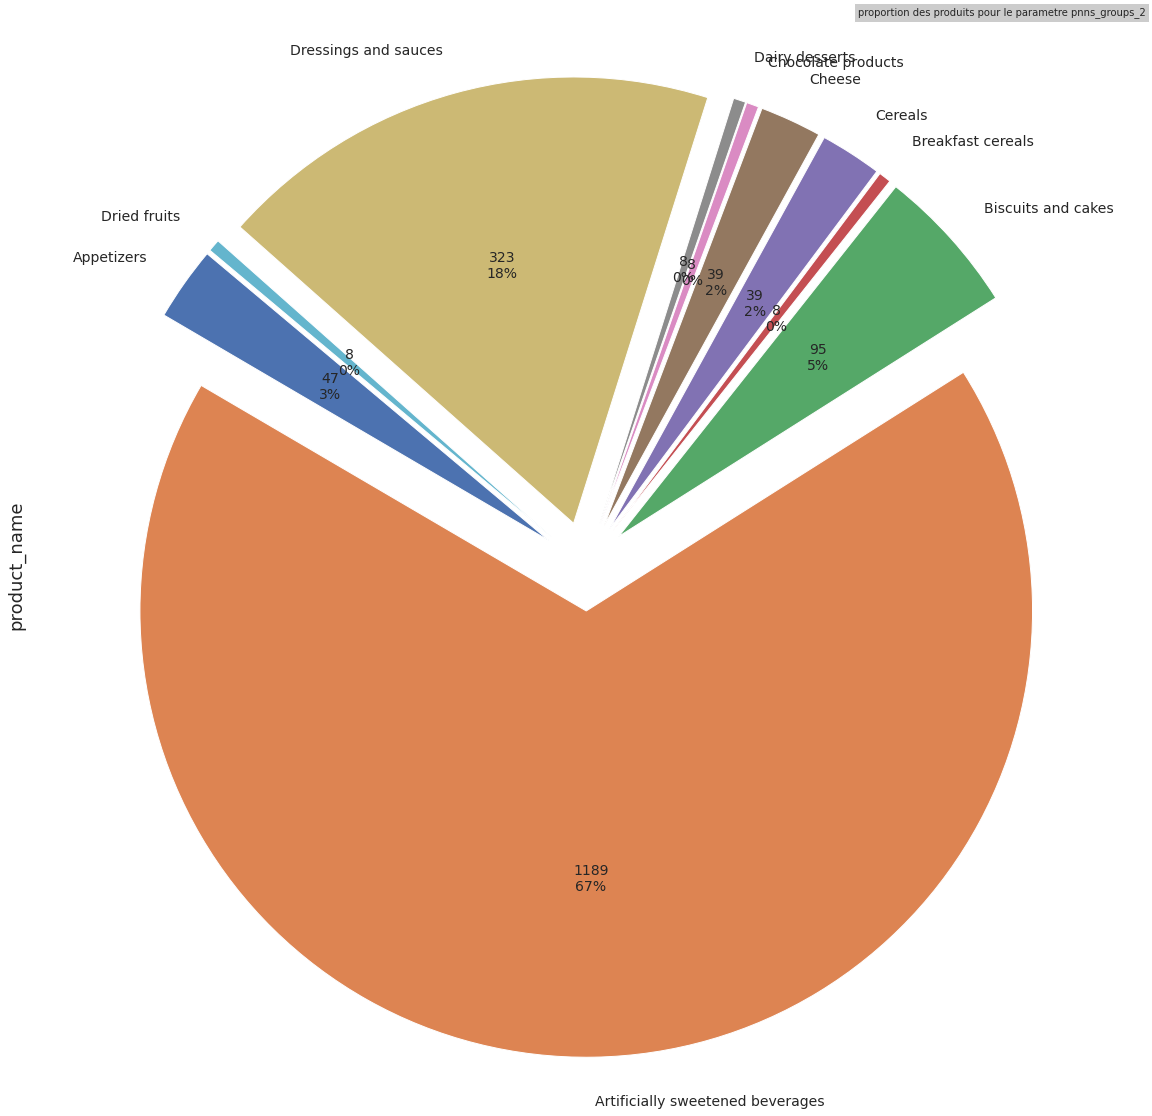

In [488]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



def label_function(val):
    return f'{val / 100 * len(categorical_data):.0f}\n{val:.0f}%'

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(20,20))

categorical_data.groupby(['pnns_groups_2'])['product_name'].size().head(10).plot(kind='pie',autopct=label_function, textprops={'fontsize': 14},
                                ax=ax1, explode=explode, startangle=140)

plt.title("proportion des produits pour le parametre pnns_groups_2", 
          bbox={'facecolor':'0.8', 'pad':4},
          fontsize='10',
          loc="right")

ax1.axis('equal')

plt.show()

In [489]:
# #pie chart
# def Pie_Chart():
#     fig, ax = plt.subplots(2,4,figsize = (25,13))
#     for idx, (col, impute_cols) in enumerate(categorical_data.groupby(level=0,axis=1)):
#         myFreq = categorical_data[col].value_counts().head(3)

#         myCounts = myFreq.values
#         categories = myFreq.keys()
        
#         ax1=ax[idx//4,idx%4]
#         ax1.pie(myCounts, startangle=75, labels = categories, autopct='%1.1f',
#         explode = [0, 0.2, 0.5])
# #         ax1.legend(title=col, loc="best")
#     plt.show()

In [490]:
# Pie_Chart()

# Analyse multivariée
## Visualisation des données en deux dimensions (2-D)
### Caractéristiques Numériques

In [491]:
categorical_data = categorical_data.copy()
numeric_data = numeric_data.copy()

In [492]:
numeric_data

carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776              0.03000    0.050000                       0.7500   
20832              0.03400    0.044444                       0.2200   
20834              0.03000    0.044444                       0.7500   
27150              0.01500    0.000111                       0.0000   
36080              0.00800    0.005556                       0.1420   
...                    ...         ...                          ...   
318340             0.00000    0.000000                       0.0000   
318360             0.04640    0.000000                       0.0440   
318393             0.05068    0.000000                       0.3416   
318394             0.04560    0.000000                       0.0000   
320763             0.00500    0.011111                       0.0620   

        energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  \
20776         0.880            0.000000        0.000       0.043636   
20832         0.210            0.000000        0.031       0.043636   
20834         0.800            0.000000        0.030       0.040000   
27150         0.420            0.000000        0.015       0.000000   
36080         0.290            0.004167        0.008       0.003636   
...             ...                 ...          ...            ...   
318340        0.018            0.000000        0.000       0.000000   
318360        0.840            0.000000        0.046       0.000000   
318393        0.790            0.000000        0.044       0.000000   
318394        0.790            0.000000        0.045       0.000000   
320763        0.210            0.008333        0.005       0.018182   

        salt_100g  sodium_100g  nutrition-score-fr_100g  
20776    0.005556     0.005556                 0.161290  
20832    0.005556     0.005556                 0.161290  
20834    0.007222     0.007222                 0.161290  
27150    0.002222     0.002222                 0.451613  
36080    0.002778     0.002778                 0.419355  
...           ...          ...                      ...  
318340   0.003333     0.003333                 0.387097  
318360   0.000000     0.000000                 0.580645  
318393   0.034444     0.034444                 0.290323  
318394   0.002778     0.002778                 0.548387  
320763   0.001411     0.001411                 0.419355  

[1764 rows x 10 columns]

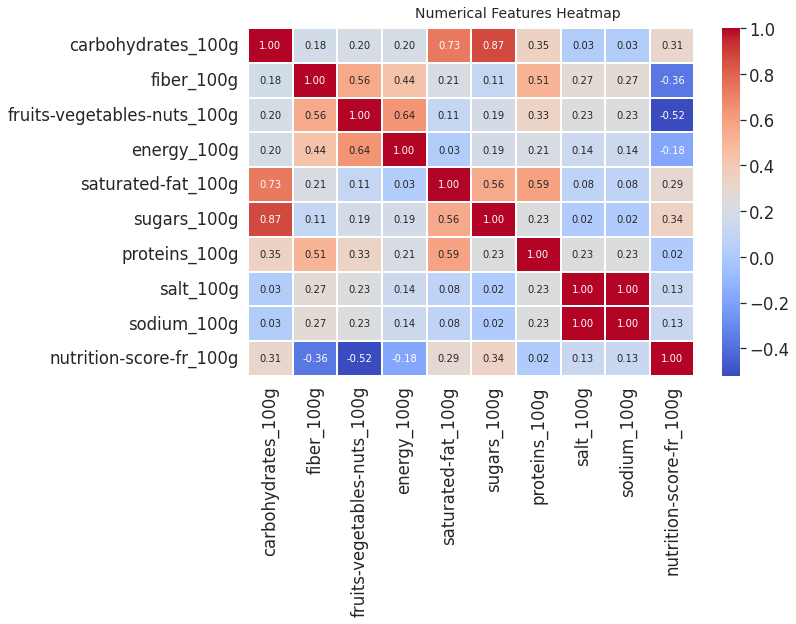

In [493]:
# Correlation Matrix Heatmap 
# DataFrame.corr(method='pearson', min_periods=1)

f, ax = plt.subplots(figsize=(10, 6))
corr = numeric_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Numerical Features Heatmap', fontsize=14)

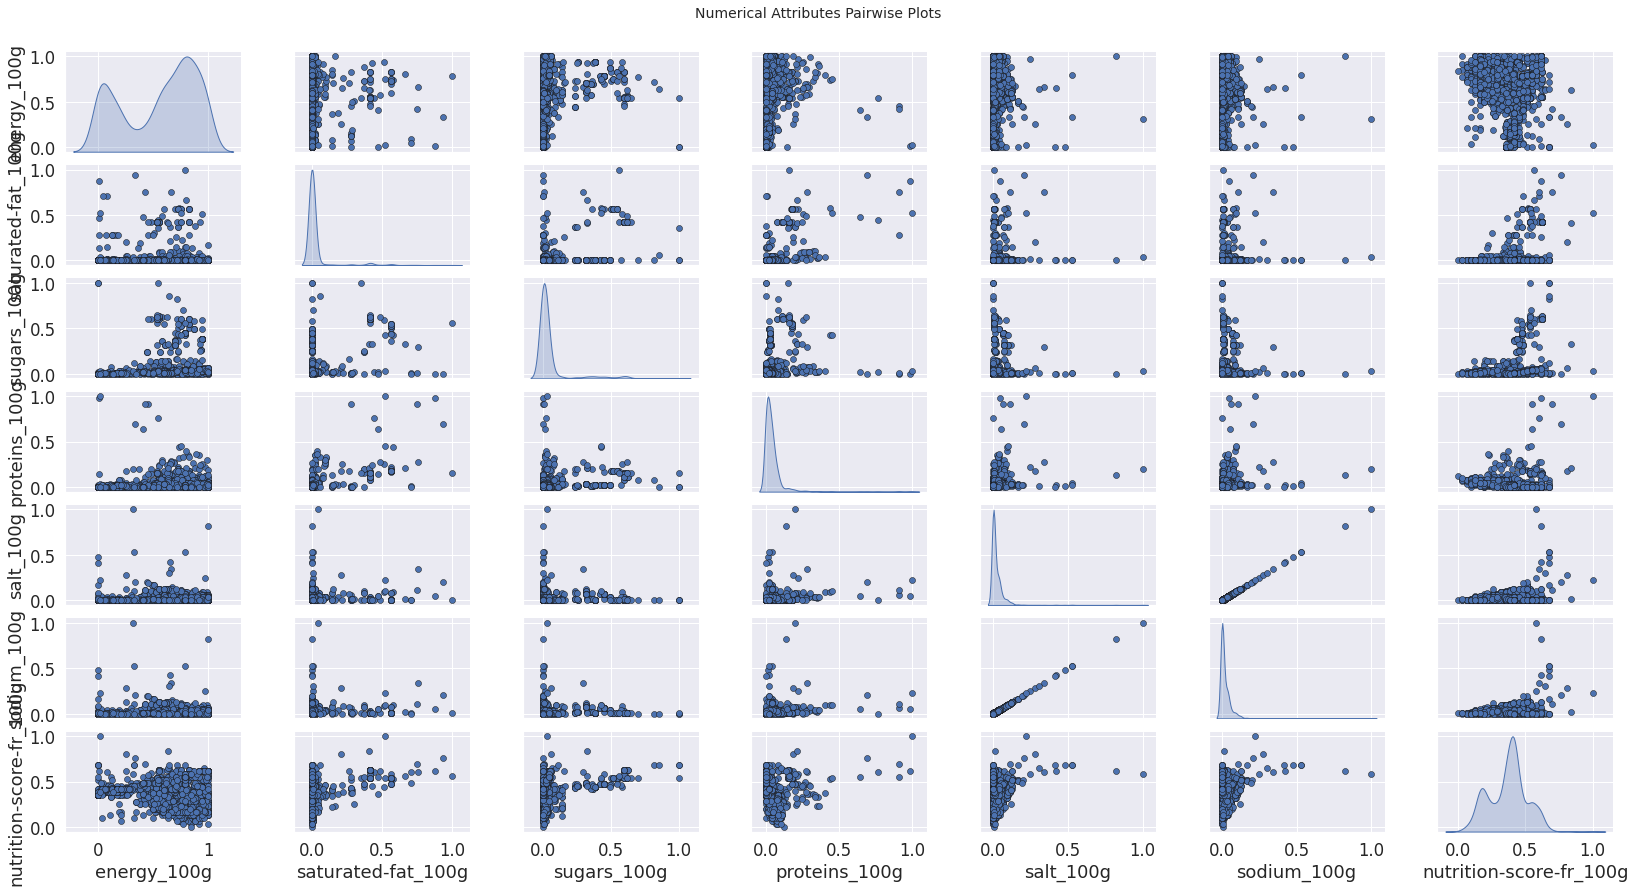

In [494]:
# Pair-wise Scatter Plots
cols = ['energy_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g', 'nutrition-score-fr_100g']

pp = sns.pairplot(numeric_data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Numerical Attributes Pairwise Plots', fontsize=14)

In [495]:
# scatter plots 
import matplotlib.pyplot as plt
import numpy as np

def ScatterPlots():
    fig, ax = plt.subplots(10,10,figsize = (35,35))
    for idx_i, i in enumerate(list(numeric_data.columns)):
        for idx_j, j in enumerate(list(numeric_data.columns)):
            ax1=ax[idx_i,idx_j]
            if idx_i==0:
                ax1.set_title(j)  
            if idx_j==0:
                ax1.set_ylabel(i)
            
            if idx_i==idx_j:
                continue
            x = numeric_data[i]
            y = numeric_data[j]
            ax1.scatter(x, y, alpha=0.4, marker='o')

    plt.show()      

In [496]:
numeric_data.head()

carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776               0.030    0.050000                        0.750   
20832               0.034    0.044444                        0.220   
20834               0.030    0.044444                        0.750   
27150               0.015    0.000111                        0.000   
36080               0.008    0.005556                        0.142   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
20776         0.88            0.000000        0.000       0.043636   0.005556   
20832         0.21            0.000000        0.031       0.043636   0.005556   
20834         0.80            0.000000        0.030       0.040000   0.007222   
27150         0.42            0.000000        0.015       0.000000   0.002222   
36080         0.29            0.004167        0.008       0.003636   0.002778   

       sodium_100g  nutrition-score-fr_100g  
20776     0.005556                 0.161290  
20832     0.005556                 0.161290  
20834     0.007222                 0.161290  
27150     0.002222                 0.451613  
36080     0.002778                 0.419355

In [497]:
# scatter plots 
import matplotlib.pyplot as plt
import numpy as np

def ScatterPlots():
    fig, ax = plt.subplots(10,10,figsize = (35,35))
    for idx_i, i in enumerate(list(numeric_data.columns)):
        for idx_j, j in enumerate(list(numeric_data.columns)):
            ax1=ax[idx_i,idx_j]
            if idx_i==0:
                ax1.set_title(j)  
            if idx_j==0:
                ax1.set_ylabel(i)
            
            if idx_i==idx_j:
                continue
            x = numeric_data[i]
            y = numeric_data[j]
            ax1.scatter(x, y, alpha=0.4, marker='o')

    plt.show()      

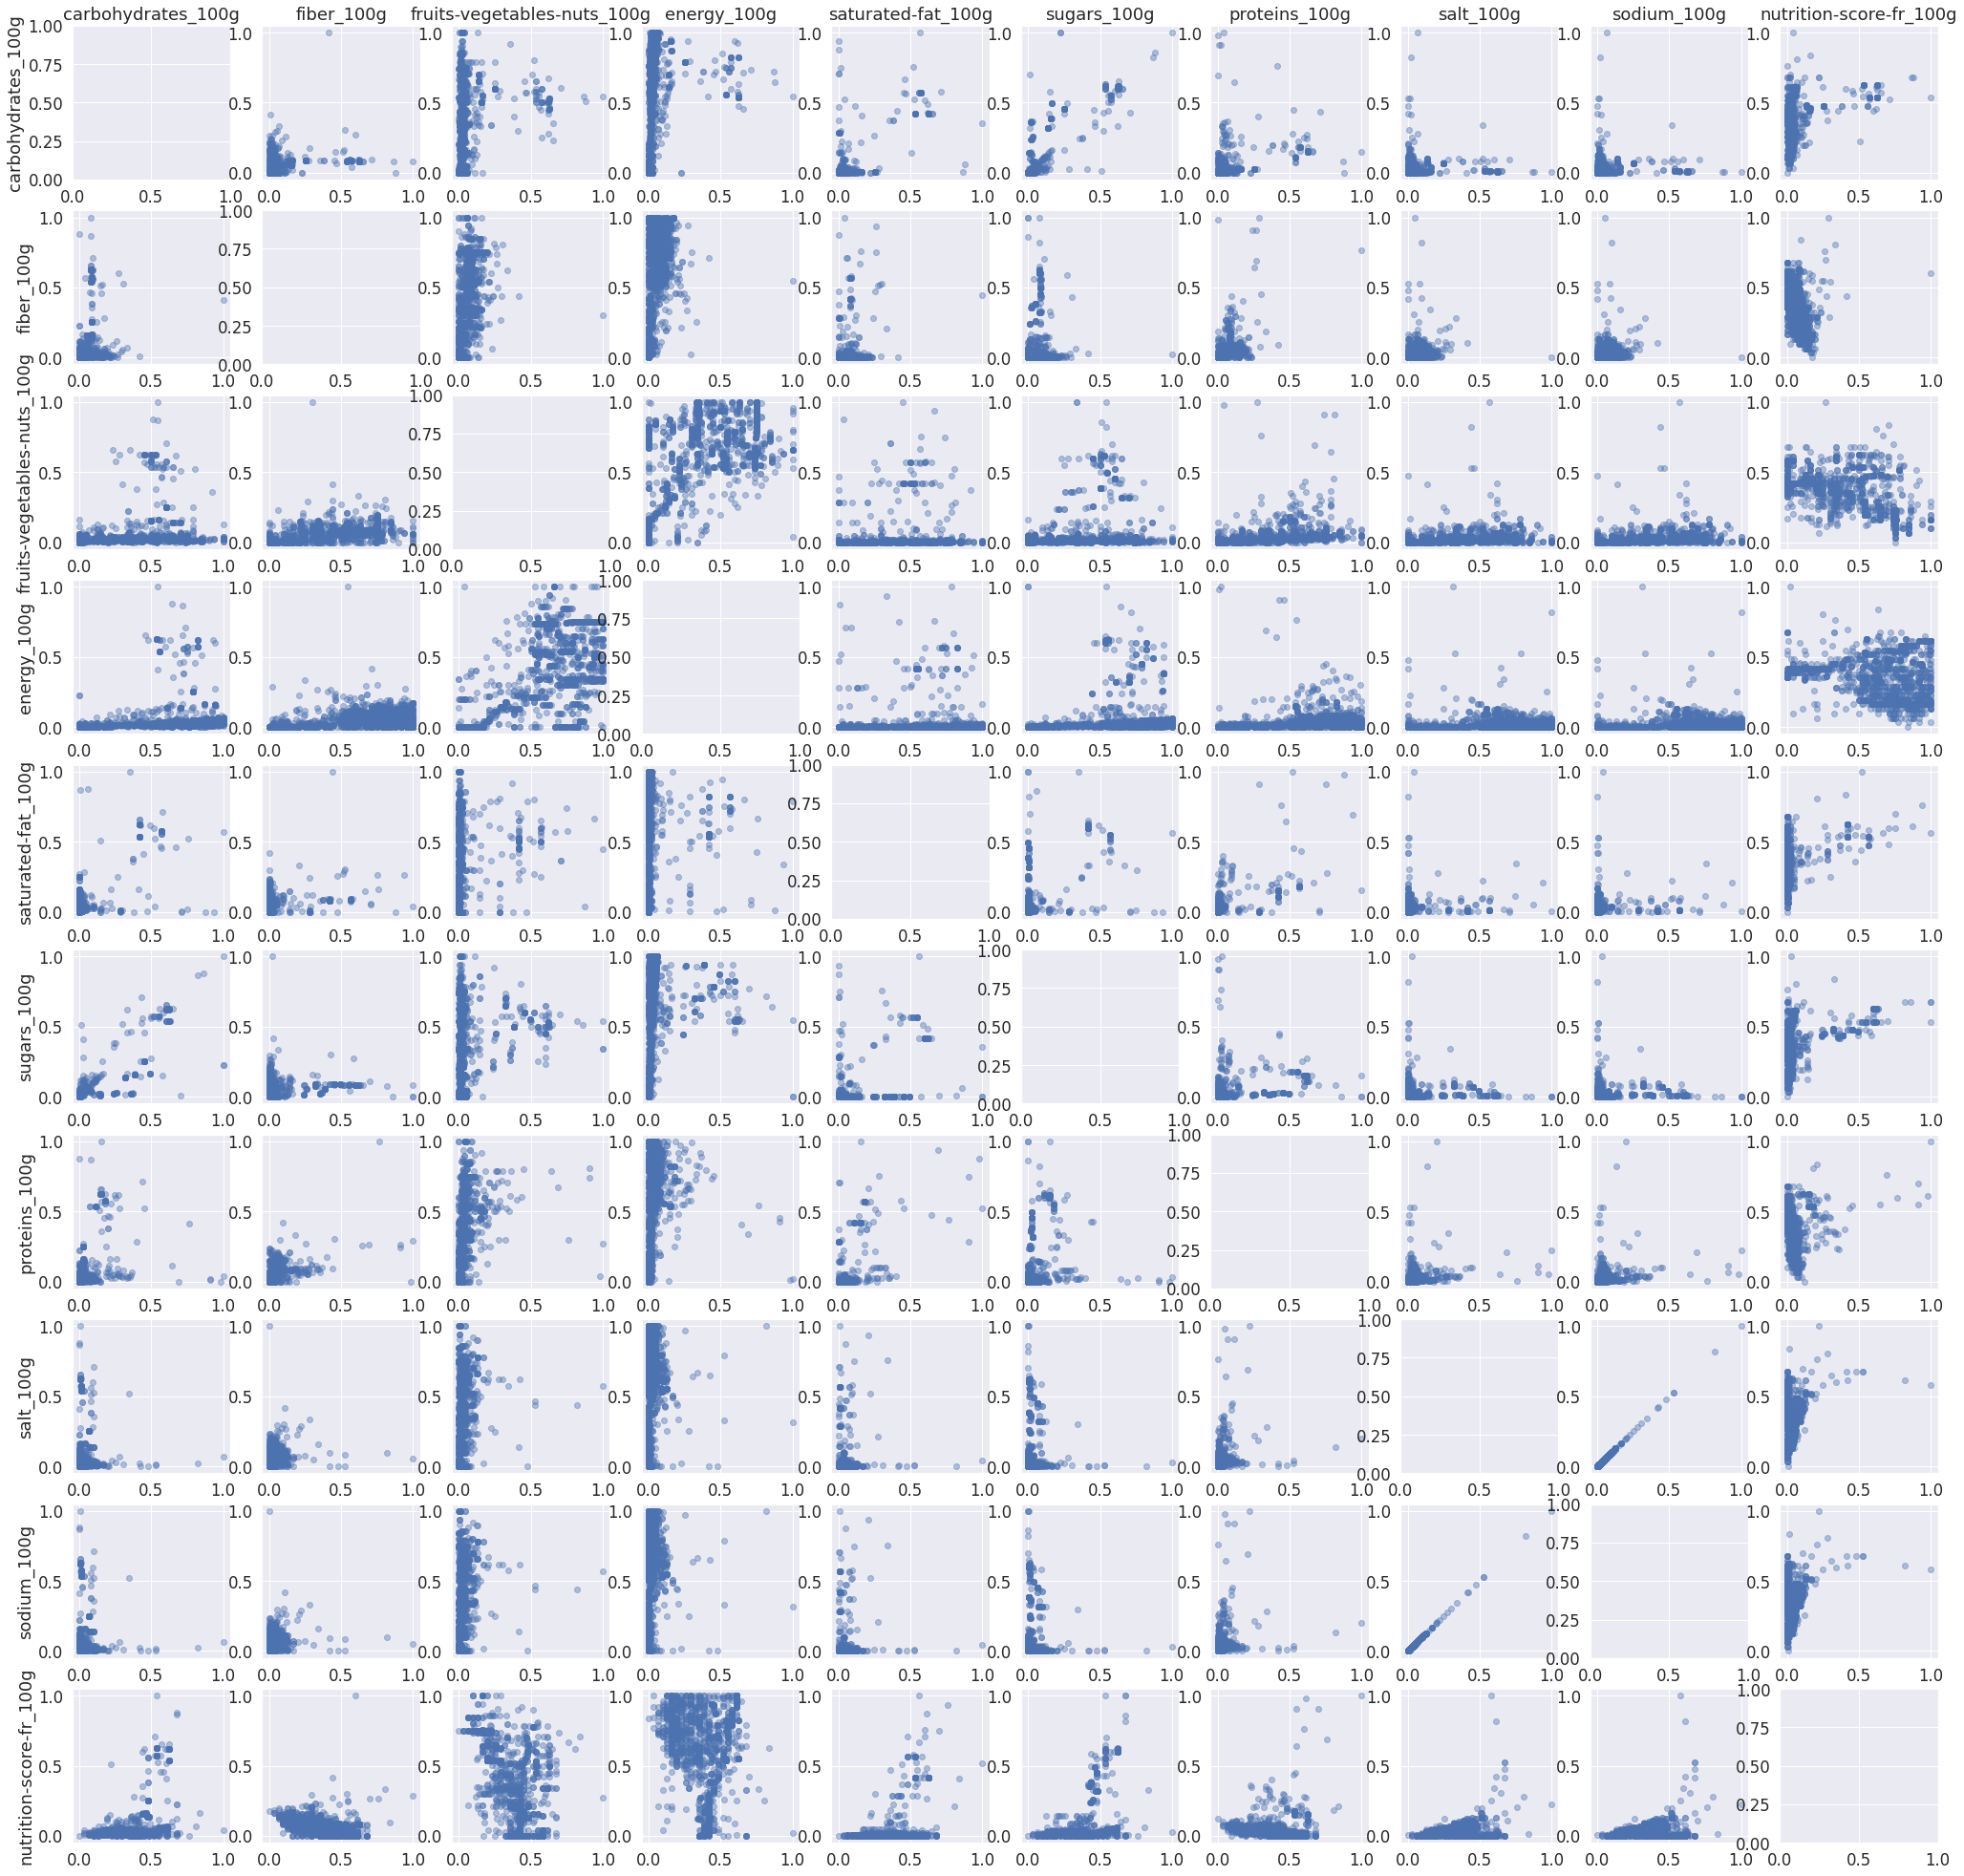

In [498]:
ScatterPlots()

### Caractéristiques catégorielles

In [499]:
categorical_data = categorical_data.copy()

In [500]:
df_nutrigrade = categorical_data["nutrition_grade_fr"]

In [501]:
# Merge the categorical and numerical features 
df_boxplot = pd.merge(numeric_data, df_nutrigrade, left_index=True, right_index=True)

In [502]:
df_boxplot

carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776              0.03000    0.050000                       0.7500   
20832              0.03400    0.044444                       0.2200   
20834              0.03000    0.044444                       0.7500   
27150              0.01500    0.000111                       0.0000   
36080              0.00800    0.005556                       0.1420   
...                    ...         ...                          ...   
318340             0.00000    0.000000                       0.0000   
318360             0.04640    0.000000                       0.0440   
318393             0.05068    0.000000                       0.3416   
318394             0.04560    0.000000                       0.0000   
320763             0.00500    0.011111                       0.0620   

        energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  \
20776         0.880            0.000000        0.000       0.043636   
20832         0.210            0.000000        0.031       0.043636   
20834         0.800            0.000000        0.030       0.040000   
27150         0.420            0.000000        0.015       0.000000   
36080         0.290            0.004167        0.008       0.003636   
...             ...                 ...          ...            ...   
318340        0.018            0.000000        0.000       0.000000   
318360        0.840            0.000000        0.046       0.000000   
318393        0.790            0.000000        0.044       0.000000   
318394        0.790            0.000000        0.045       0.000000   
320763        0.210            0.008333        0.005       0.018182   

        salt_100g  sodium_100g  nutrition-score-fr_100g nutrition_grade_fr  
20776    0.005556     0.005556                 0.161290                  a  
20832    0.005556     0.005556                 0.161290                  a  
20834    0.007222     0.007222                 0.161290                  a  
27150    0.002222     0.002222                 0.451613                  c  
36080    0.002778     0.002778                 0.419355                  c  
...           ...          ...                      ...                ...  
318340   0.003333     0.003333                 0.387097                  b  
318360   0.000000     0.000000                 0.580645                  d  
318393   0.034444     0.034444                 0.290323                  b  
318394   0.002778     0.002778                 0.548387                  d  
320763   0.001411     0.001411                 0.419355                  c  

[1764 rows x 11 columns]

In [503]:
df_boxplot.columns

Index(['carbohydrates_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g',
       'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition_grade_fr'],
      dtype='object')

Text(0, 0.5, 'nutrition_grade')

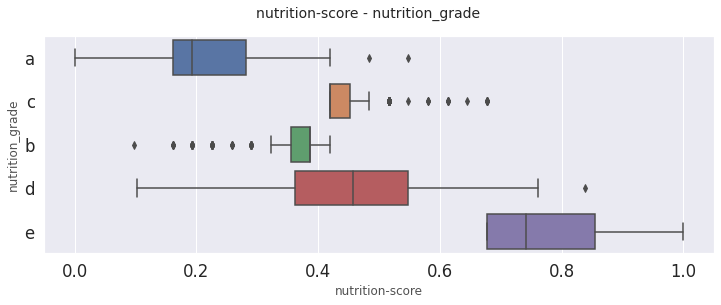

In [504]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('nutrition-score - nutrition_grade', fontsize=14)

sns.boxplot(x="nutrition-score-fr_100g", y="nutrition_grade_fr", data=df_boxplot,  ax=ax)
ax.set_xlabel("nutrition-score",size = 12,alpha=0.8)
ax.set_ylabel("nutrition_grade",size = 12,alpha=0.8)

Text(0, 0.5, 'nutrition_grade')

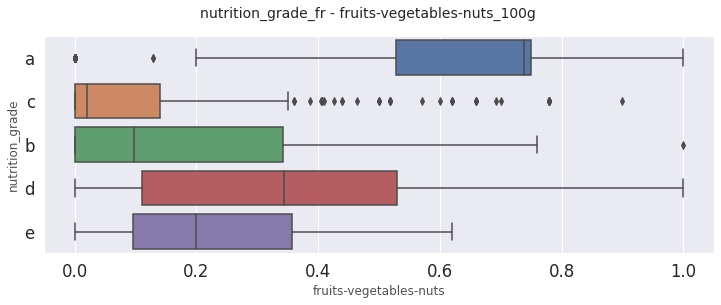

In [505]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('nutrition_grade_fr - fruits-vegetables-nuts_100g', fontsize=14)

sns.boxplot(x="fruits-vegetables-nuts_100g", y="nutrition_grade_fr", data=df_boxplot,  ax=ax)
ax.set_xlabel("fruits-vegetables-nuts",size = 12,alpha=0.8)
ax.set_ylabel("nutrition_grade",size = 12,alpha=0.8)

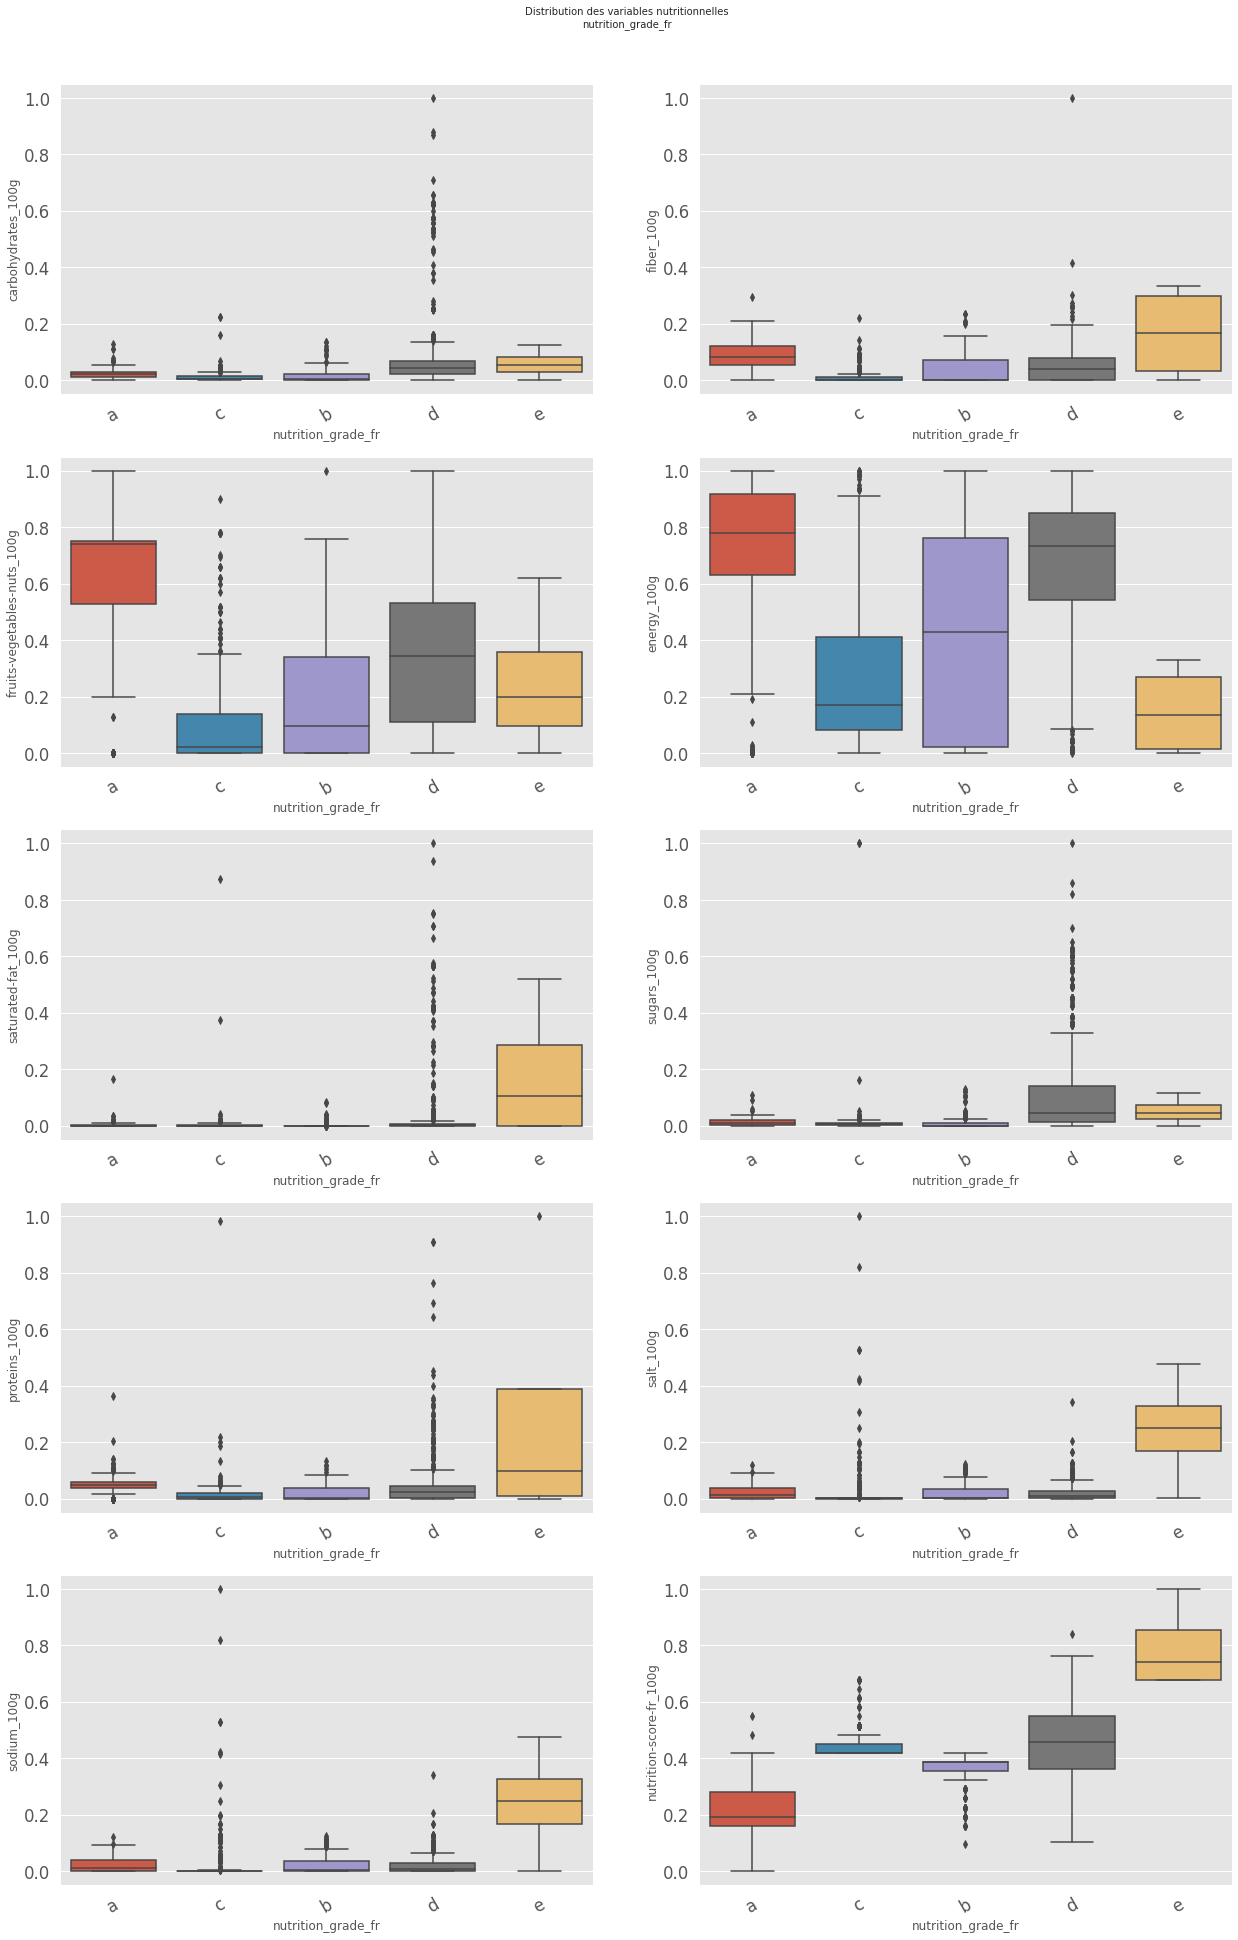

In [506]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

numerical_features = ['carbohydrates_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g',
       'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="nutrition_grade_fr", y=colonne, data=df_boxplot[df_boxplot["nutrition_grade_fr"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1
    
fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "nutrition_grade_fr", ha="center")

plt.show()

# Analise Multivarie (3-D)
## Analyse descriptive (Analyse en Composantes Principales (ACP))
- L'ACP est une technique de réduction de dimensionnalité qui transforme un certain nombre de variables corrélées en un plus petit nombre de variables non corrélées.
- Le but de l'ACP est d'extraire les informations les plus importantes de la table de données en compressant la taille du jeu de données et en ne gardant que les informations importantes.
- L'analyse en composantes principales (ACP) est un moyen courant d'accélérer un algorithme d'apprentissage automatique. Peut également être utilisé pour la visualisation de données.

**Points supplémentaires :**
- La première composante principale doit avoir la plus grande variance (inertie) et donc cette composante expliquera la plus grande partie de l'inertie/variance
- Pour chaque composant ajouté, l'inertie augmentera

### Sélectionner le nombre de composants à partir du pourcentage que nous voulons obtenir

In [507]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(numeric_data)
reduced = pca.transform(numeric_data)
print('Original Dimensions: ',numeric_data.shape)
print('Reduced Dimensions: ',reduced.shape)

Original Dimensions:  (1764, 10)
Reduced Dimensions:  (1764, 5)


In [508]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#converter n dimention to the number of dimentions we want
pca = PCA(n_components=5, random_state = 42)
pca_fit = pca.fit(numeric_data).transform(numeric_data)
print (pca.explained_variance_ratio_)

[0.6247683  0.15417448 0.13011143 0.03206861 0.02747756]


In [509]:
numeric_data

carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776              0.03000    0.050000                       0.7500   
20832              0.03400    0.044444                       0.2200   
20834              0.03000    0.044444                       0.7500   
27150              0.01500    0.000111                       0.0000   
36080              0.00800    0.005556                       0.1420   
...                    ...         ...                          ...   
318340             0.00000    0.000000                       0.0000   
318360             0.04640    0.000000                       0.0440   
318393             0.05068    0.000000                       0.3416   
318394             0.04560    0.000000                       0.0000   
320763             0.00500    0.011111                       0.0620   

        energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  \
20776         0.880            0.000000        0.000       0.043636   
20832         0.210            0.000000        0.031       0.043636   
20834         0.800            0.000000        0.030       0.040000   
27150         0.420            0.000000        0.015       0.000000   
36080         0.290            0.004167        0.008       0.003636   
...             ...                 ...          ...            ...   
318340        0.018            0.000000        0.000       0.000000   
318360        0.840            0.000000        0.046       0.000000   
318393        0.790            0.000000        0.044       0.000000   
318394        0.790            0.000000        0.045       0.000000   
320763        0.210            0.008333        0.005       0.018182   

        salt_100g  sodium_100g  nutrition-score-fr_100g  
20776    0.005556     0.005556                 0.161290  
20832    0.005556     0.005556                 0.161290  
20834    0.007222     0.007222                 0.161290  
27150    0.002222     0.002222                 0.451613  
36080    0.002778     0.002778                 0.419355  
...           ...          ...                      ...  
318340   0.003333     0.003333                 0.387097  
318360   0.000000     0.000000                 0.580645  
318393   0.034444     0.034444                 0.290323  
318394   0.002778     0.002778                 0.548387  
320763   0.001411     0.001411                 0.419355  

[1764 rows x 10 columns]

In [510]:
import seaborn as sn
df_pc = pd.DataFrame(data = pca_fit, columns = ['pc1','pc2','pc3','pc4','pc5'])
df_pc=df_pc.drop(['pc4'],axis=1)
df_pc=df_pc.drop(['pc5'],axis=1)


# df_col = pd.concat([df_pc,numeric_data], axis=1)
# # df_col
# covMatrix = pd.DataFrame.cov(df_col)
# sn.set(rc={'figure.figsize':(30,24)}, font_scale=1.5)
# sn.heatmap(covMatrix, annot=True, fmt='.6f')
# plt.figure(figsize=(48,38))
# plt.show();

# Expliquer les composants observés

PCA 1 — Pour la première composante les **protéines** et le **sodium** ont le poids plus élevé.Le **nutrition_score_fr** a le poids moins élevé.

PCA 2 — La deuxième composante principale a un poids plus eleve pour le **sucre** et le ca **nutrition_score_fr**, **proteins** et les **glucides**.

# Nuage de points de toutes les communautés le long de deux des PC (PC1 vs PC2 ou PC1 vs PC3)

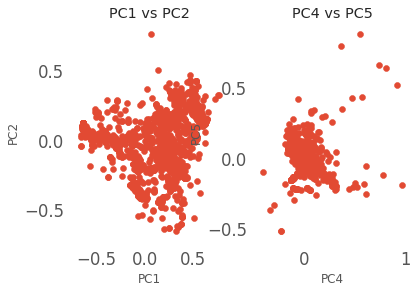

<Figure size 864x576 with 0 Axes>

In [511]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(pca_fit[:, 0],pca_fit[:, 1])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_frame_on(False)
ax1.grid(True)
ax1.set_title('PC1 vs PC2')

ax2.scatter(pca_fit[:, 3],pca_fit[:, 4])
ax2.set_xlabel("PC4")
ax2.set_ylabel("PC5")
ax2.set_title('PC4 vs PC5')
ax2.grid(True)
ax2.set_frame_on(False)

In [512]:
numeric_data.shape

(1764, 10)

In [513]:
df_color = pd.merge(categorical_data, numeric_data, how = 'inner', left_index=True, right_index=True)
df_color.shape

(1764, 18)

In [514]:
df_color.columns

Index(['product_name', 'quantity', 'packaging_tags', 'categories_fr',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2',
       'main_category_fr', 'carbohydrates_100g', 'fiber_100g',
       'fruits-vegetables-nuts_100g', 'energy_100g', 'saturated-fat_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [515]:
df_anova = df_color.copy()

In [516]:
df_anova = df_color.drop(['product_name', 'quantity', 'packaging_tags', 'categories_fr', 'main_category_fr'], axis=1)

In [517]:
df_color = df_color.drop(['product_name', 'quantity', 'packaging_tags', 'categories_fr', 'main_category_fr', 'pnns_groups_1', 'pnns_groups_2'], axis=1)

In [518]:
df_color.head(2)

nutrition_grade_fr  carbohydrates_100g  fiber_100g  \
20776                  a               0.030    0.050000   
20832                  a               0.034    0.044444   

       fruits-vegetables-nuts_100g  energy_100g  saturated-fat_100g  \
20776                         0.75         0.88                 0.0   
20832                         0.22         0.21                 0.0   

       sugars_100g  proteins_100g  salt_100g  sodium_100g  \
20776        0.000       0.043636   0.005556     0.005556   
20832        0.031       0.043636   0.005556     0.005556   

       nutrition-score-fr_100g  
20776                  0.16129  
20832                  0.16129

In [519]:
df_original = df_color

In [520]:
#enlever 'nutrition_grade_fr' 
s = df_original.pop('nutrition_grade_fr')

In [521]:
new_df = pd.concat([df_original, s], 1)
new_df.head(2)

carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776               0.030    0.050000                         0.75   
20832               0.034    0.044444                         0.22   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
20776         0.88                 0.0        0.000       0.043636   0.005556   
20832         0.21                 0.0        0.031       0.043636   0.005556   

       sodium_100g  nutrition-score-fr_100g nutrition_grade_fr  
20776     0.005556                  0.16129                  a  
20832     0.005556                  0.16129                  a

In [522]:
import plotly.express as px

df = new_df
features = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g', 'carbohydrates_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g'] 

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color=df["nutrition_grade_fr"]
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Scater matrix of features vs nutrition_grade_fr',
    dragmode='select',
    width=1400,
    height=1400,
    hovermode='closest',
)
fig.show()

In [523]:
## Play with PCA
import plotly.express as px
from sklearn.decomposition import PCA

df = new_df
# features = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
#        'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'] 

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
      components,
      labels=labels,
      dimensions=range(10),
      color=df["nutrition_grade_fr"],
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='Scater matrix of PCA vs nutrition_grade_fr',
    dragmode='select',
    width=1400,
    height=1400,
    hovermode='closest',
)
fig.show()

In [524]:
df_color = new_df.set_index('nutrition_grade_fr')
df_color.head()


carbohydrates_100g  fiber_100g  \
nutrition_grade_fr                                   
a                                0.030    0.050000   
a                                0.034    0.044444   
a                                0.030    0.044444   
c                                0.015    0.000111   
c                                0.008    0.005556   

                    fruits-vegetables-nuts_100g  energy_100g  \
nutrition_grade_fr                                             
a                                         0.750         0.88   
a                                         0.220         0.21   
a                                         0.750         0.80   
c                                         0.000         0.42   
c                                         0.142         0.29   

                    saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
nutrition_grade_fr                                                              
a                             0.000000        0.000       0.043636   0.005556   
a                             0.000000        0.031       0.043636   0.005556   
a                             0.000000        0.030       0.040000   0.007222   
c                             0.000000        0.015       0.000000   0.002222   
c                             0.004167        0.008       0.003636   0.002778   

                    sodium_100g  nutrition-score-fr_100g  
nutrition_grade_fr                                        
a                      0.005556                 0.161290  
a                      0.005556                 0.161290  
a                      0.007222                 0.161290  
c                      0.002222                 0.451613  
c                      0.002778                 0.419355

In [525]:
X = df_color
X.head()

carbohydrates_100g  fiber_100g  \
nutrition_grade_fr                                   
a                                0.030    0.050000   
a                                0.034    0.044444   
a                                0.030    0.044444   
c                                0.015    0.000111   
c                                0.008    0.005556   

                    fruits-vegetables-nuts_100g  energy_100g  \
nutrition_grade_fr                                             
a                                         0.750         0.88   
a                                         0.220         0.21   
a                                         0.750         0.80   
c                                         0.000         0.42   
c                                         0.142         0.29   

                    saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
nutrition_grade_fr                                                              
a                             0.000000        0.000       0.043636   0.005556   
a                             0.000000        0.031       0.043636   0.005556   
a                             0.000000        0.030       0.040000   0.007222   
c                             0.000000        0.015       0.000000   0.002222   
c                             0.004167        0.008       0.003636   0.002778   

                    sodium_100g  nutrition-score-fr_100g  
nutrition_grade_fr                                        
a                      0.005556                 0.161290  
a                      0.005556                 0.161290  
a                      0.007222                 0.161290  
c                      0.002222                 0.451613  
c                      0.002778                 0.419355

In [526]:
X.describe().head(2)

carbohydrates_100g   fiber_100g  fruits-vegetables-nuts_100g  \
count         1764.000000  1764.000000                  1764.000000   
mean             0.047711     0.049679                     0.334434   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  \
count  1764.000000         1764.000000  1764.000000    1764.000000   
mean      0.549281            0.026062     0.052775       0.038529   

        salt_100g  sodium_100g  nutrition-score-fr_100g  
count  1764.00000   1764.00000              1764.000000  
mean      0.02247      0.02249                 0.368305

In [527]:
from sklearn.decomposition import PCA

n_components=10

pca_n = PCA(n_components=n_components, random_state=42)

pca_n.fit(X)

PCA(n_components=10, random_state=42)

#### Explained Variance Ratio

In [528]:
pca_n.explained_variance_ratio_.round(2)

array([0.62, 0.15, 0.13, 0.03, 0.03, 0.01, 0.01, 0.01, 0.  , 0.  ])

In [529]:
pca_n.explained_variance_ratio_.cumsum().round(2)

array([0.62, 0.78, 0.91, 0.94, 0.97, 0.98, 0.99, 1.  , 1.  , 1.  ])

#### Scree Plot

In [530]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

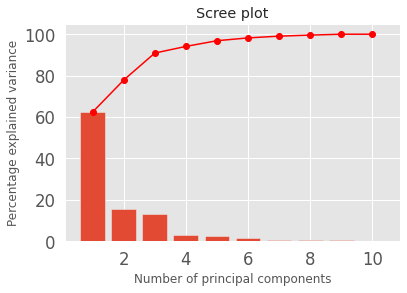

In [531]:
display_scree_plot(pca_n) 

#### Component Scores

In [532]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]

In [533]:
X.columns

Index(['carbohydrates_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g',
       'energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [534]:
pc1

array([ 0.74940573,  0.02388461,  0.07352933,  0.05314838,  0.0239666 ,
        0.02398887, -0.12674183,  0.06609292,  0.08033542,  0.63368277])

In [535]:
pc2

array([-0.473382  , -0.18490174, -0.33359048, -0.02721836,  0.0018614 ,
        0.00177989, -0.51611172, -0.28601238,  0.04236072,  0.52888744])

#### Cercle de corrélation

In [536]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='20', ha='center', va='center', rotation=label_rotation, color="blue", alpha=1)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

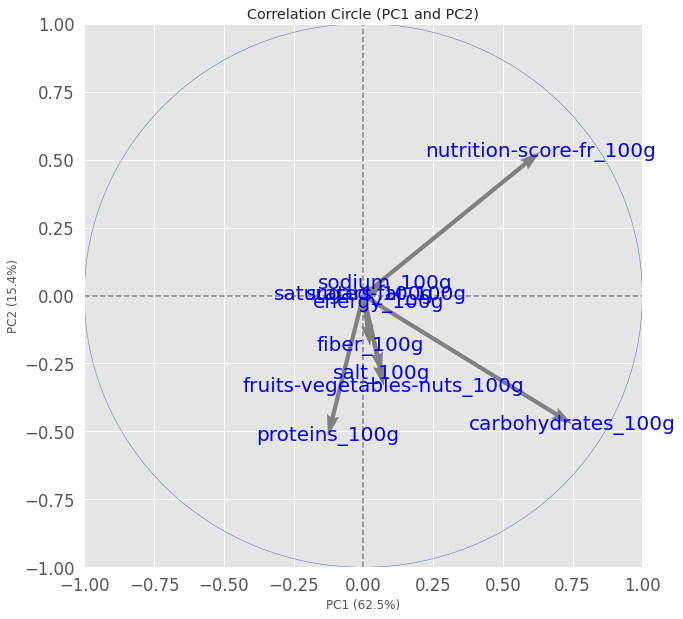

In [537]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, n_components, pca, [(0,1)], labels = np.array(X.columns),) 

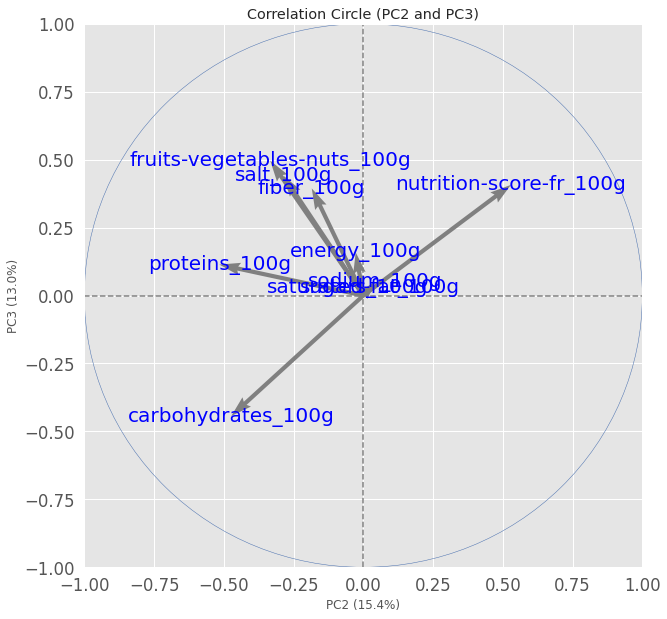

In [538]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, n_components, pca, [(1,2)], labels = np.array(X.columns),) 

  Analyse de réduction dimensionnelle :
  
  PCA :
  
    - Graphique PCA, la majeure partie de la variance expliquée provient de la 1ère et 2ᵉ composantes. La première composante explique environ 31 % de la variance, la deuxième composante explique environ 27 % de la variance et la 3e composante explique 10 % de la variance.
    
    Cercle de corrélation :
    - les paramètres qui sont les plus proches, sont plus liés les uns aux autres, sont corrélés (protéines, vegetables-nuts et nutriscore). Les composantes les plus éloignées des axes (0, 0) sont les composantes qui contribuent le plus à expliquer la variance.
    - Plus les composantes sont proches de 0, moins elles sont pertinentes pour notre analyse et peuvent être supprimées du modèle.
    - les paramètres opposés sont affichés sur le côté opposé du graphique (energy_100gr n'est pas corrélé avec le nutriscore) 
    
    - axes des abscisses (représente le 1ʳᵉ composant) et la corrélation entre les features de notre dataframe
    - axes des ordonnés (représente le 2emme composante) 
    angles : 
    - un angle entre 2 variables qu'est proche de 0 ont dit que on a une corrélation quasi parfaite. 
    - si on a un angle entre 2 variables qui est proche de 180% ont dit que on a une corrélation négative quasi parfaite -1.
    - si on a un agle de 90% ont a une corrélation nulle quasi 0. 

#### Projection des individuos

In [539]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

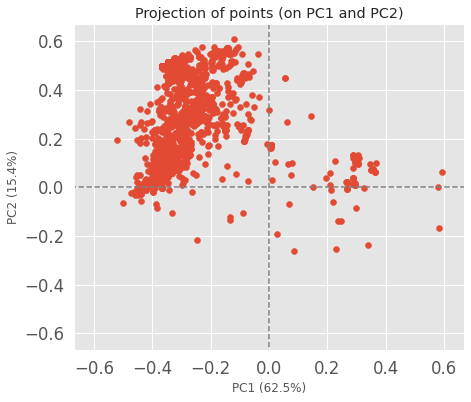

In [540]:
# Transform the original scaled data to the new vector space
X_projected = pca.transform(X) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(X_projected, n_components, pca, [(0,1)])
plt.show()


In [541]:
p = PCA(n_components=2, random_state=42)

In [542]:
p.fit(df_color)

PCA(n_components=2, random_state=42)

In [543]:
print (p.explained_variance_ratio_)

[0.6247683  0.15417448]


In [544]:
print (p.explained_variance_ratio_.cumsum())

[0.6247683  0.77894278]


In [545]:
X_projected = p.transform(df_color)

In [546]:
X_projected.shape

(1764, 2)

In [547]:
df_color.head(2)

carbohydrates_100g  fiber_100g  \
nutrition_grade_fr                                   
a                                0.030    0.050000   
a                                0.034    0.044444   

                    fruits-vegetables-nuts_100g  energy_100g  \
nutrition_grade_fr                                             
a                                          0.75         0.88   
a                                          0.22         0.21   

                    saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
nutrition_grade_fr                                                              
a                                  0.0        0.000       0.043636   0.005556   
a                                  0.0        0.031       0.043636   0.005556   

                    sodium_100g  nutrition-score-fr_100g  
nutrition_grade_fr                                        
a                      0.005556                  0.16129  
a                      0.005556                  0.16129

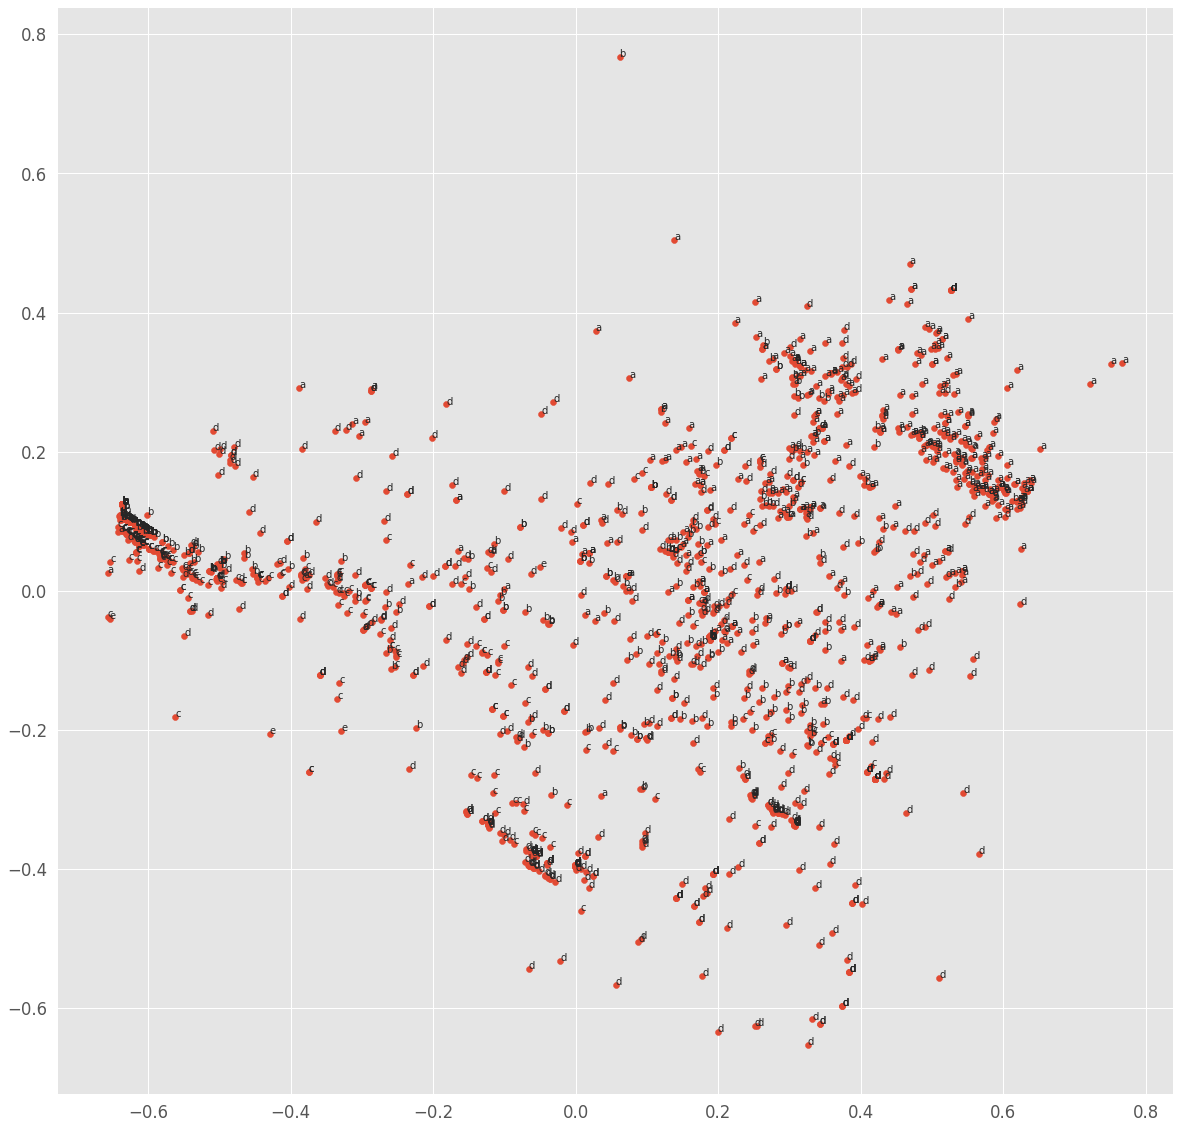

In [548]:
fig = plt.figure(figsize=(20,20))
plt.scatter(X_projected[:, 0], X_projected[:, 1])

for i, (x, y) in enumerate(zip(X_projected[:, 0], 
                               X_projected[:, 1])):
    plt.text(x, y, df_color.index[i])

In [549]:
pcs = p.components_

Text(0, 0.5, 'PC 2')

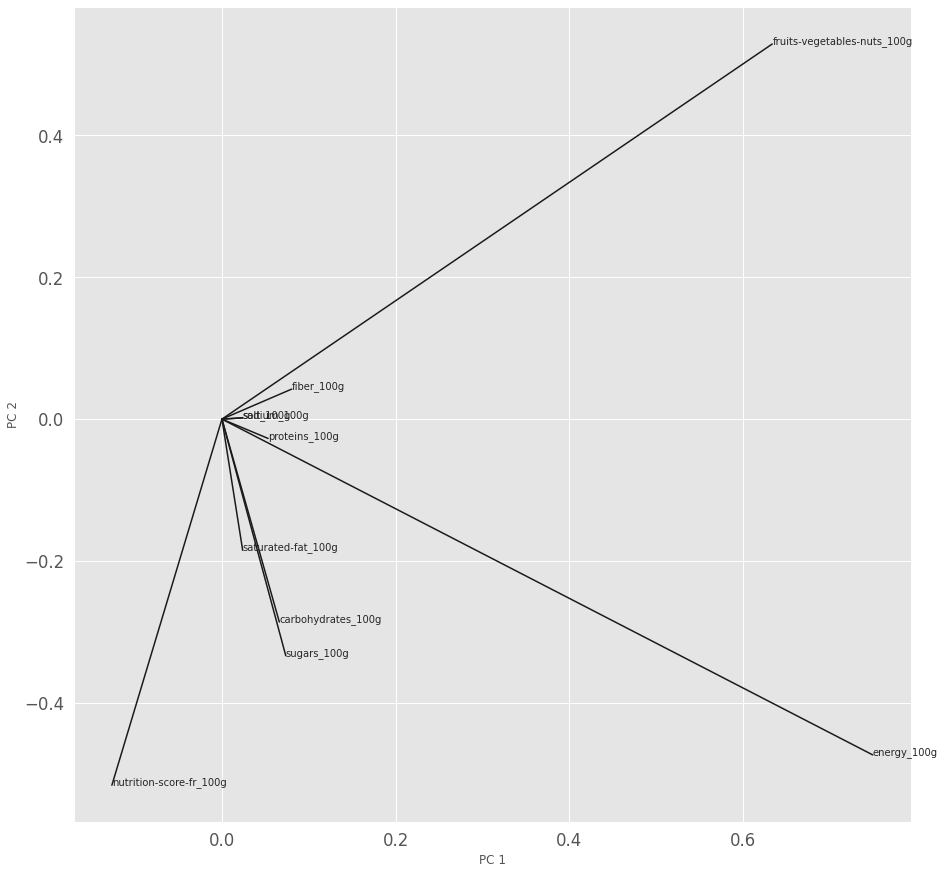

In [550]:
fig = plt.figure(figsize=(15,15))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.plot([0, x], [0, y], color='k' )
    plt.text(x, y, df_color.columns[i])
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')

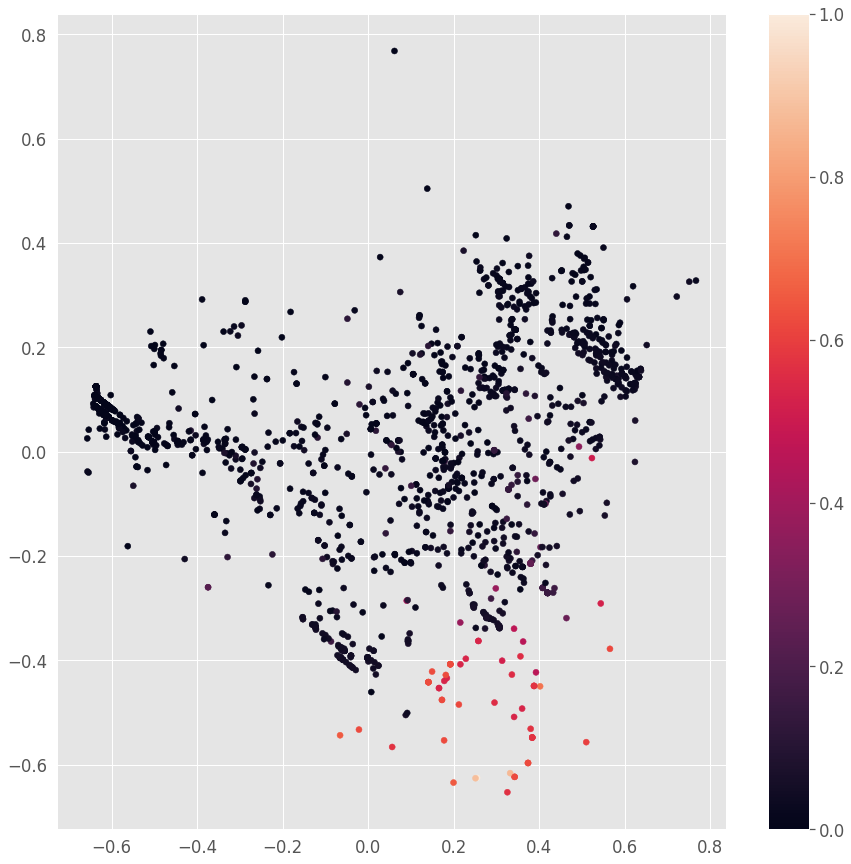

In [551]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(X_projected[:, 0], X_projected[:, 1],
           c=df_color.get('carbohydrates_100g')) 
plt.colorbar();

Le jeu de données complète est une nuage de points à 2 dimensions, et ces points sont la projection de chaque point de données au long des directions avec la plus grande variance.

# PCA aplique a K-means Clustering

In [552]:
#  !pip3 install KMeans

In [601]:
# Random n-clusters=3, pour initialiser le modèle
from sklearn.cluster import KMeans

X_train = numeric_data.values # turn my values into an array

kmeans = KMeans(n_clusters=5, random_state=42).fit(X_train)

y = kmeans.predict(X_train)

print("Les clusters sont :", kmeans.labels_) # for each row assign a label wich is the cluster
print("le inertia est:", kmeans.inertia_) #helps to evaluate the model the lower the number is better is the model

Les clusters sont : [4 0 4 ... 1 3 0]
le inertia est: 107.91786529962336


In [554]:
kmeans.labels_.shape

(68219,)

In [555]:
# Comment trouver le numéro de k

num_of_clusters = range(2, 20) #
inertia = []

for f in num_of_clusters:
    kmeans = KMeans (n_clusters=f, random_state=42).fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("La indertia pour:", f, "Clusters est:", u)

La indertia pour: 2 Clusters est: 17496.246582081083
La indertia pour: 3 Clusters est: 14308.616005087182
La indertia pour: 4 Clusters est: 12168.525544138462
La indertia pour: 5 Clusters est: 10681.764138822047
La indertia pour: 6 Clusters est: 9431.85535799724
La indertia pour: 7 Clusters est: 8624.450954226733
La indertia pour: 8 Clusters est: 7986.945239617993
La indertia pour: 9 Clusters est: 7572.501661147598
La indertia pour: 10 Clusters est: 7204.457526183341
La indertia pour: 11 Clusters est: 6803.582496659645
La indertia pour: 12 Clusters est: 6463.498903911991
La indertia pour: 13 Clusters est: 6131.62767632377
La indertia pour: 14 Clusters est: 5889.547699995321
La indertia pour: 15 Clusters est: 5666.848841648573
La indertia pour: 16 Clusters est: 5436.919096263566
La indertia pour: 17 Clusters est: 5246.419856767414
La indertia pour: 18 Clusters est: 5103.440812988673
La indertia pour: 19 Clusters est: 4967.419270236795


In [556]:
num_of_clusters

range(2, 20)

Text(0.5, 1.0, 'Inertia Plot per k')

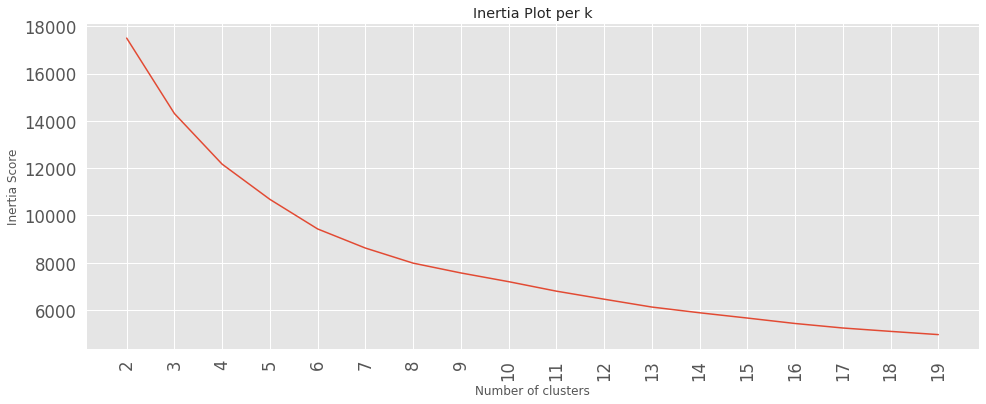

In [557]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(num_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(num_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per k')

- On peut observer que l'inertie laisse d'être tellement abrupt a 5 Clusters, donc n_clusters=5

In [558]:
from sklearn.cluster import KMeans

# k means dans n clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_train)

kmeans.labels_

# "Predictions" pour nouvelle data
predictions = kmeans.predict(X_train)

# calculer les comptes du cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# création d'un dataframe
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3", "Cluster 4"])

# Affichage
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0      36033      13714       8524       5077       4871

In [559]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [560]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [602]:
numeric_data.shape

(1764, 10)

## Exécution de l'Analyse en Composantes Principales (PCA) pour Visualization

In [562]:
X.shape
#X_r.shape

(1764, 10)

#### Identifier le "meilleur" nombre de composants

Explained variance ratio (first two components): [0.32711323 0.23781324]


<Figure size 432x288 with 0 Axes>

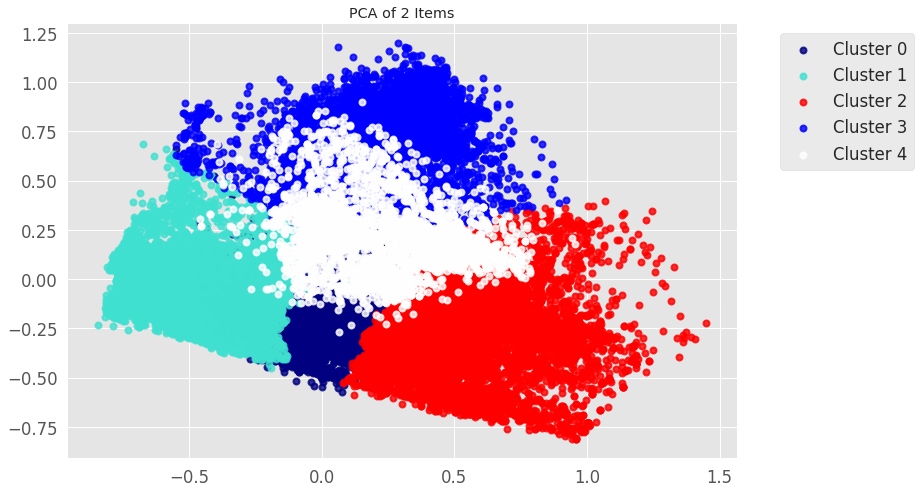

In [563]:
# Exécution de PCA pour visualiser les données

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions # labels

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3", "Cluster 4"]

pca = PCA(n_components=2, random_state = 442)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'red', 'blue', 'white']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show();

Total variance in dataset is: 0.3177234688325514
the 95% variance we want to have iss: 0.30183729539092385

variance explained with 10 components: 0.3177234688325514
variance explained with 9 components: 0.31772346755302616
variance explained with 8 components: 0.3154615419662787
variance explained with 7 components: 0.3101554500423619
variance explained with 6 components: 0.29784706608268463
variance explained with 5 components: 0.2823424396376398
variance explained with 4 components: 0.2610887791315981
variance explained with 3 components: 0.22115068011859124
variance explained with 2 components: 0.17949039732396277
variance explained with 1 components: 0.10393155127477553


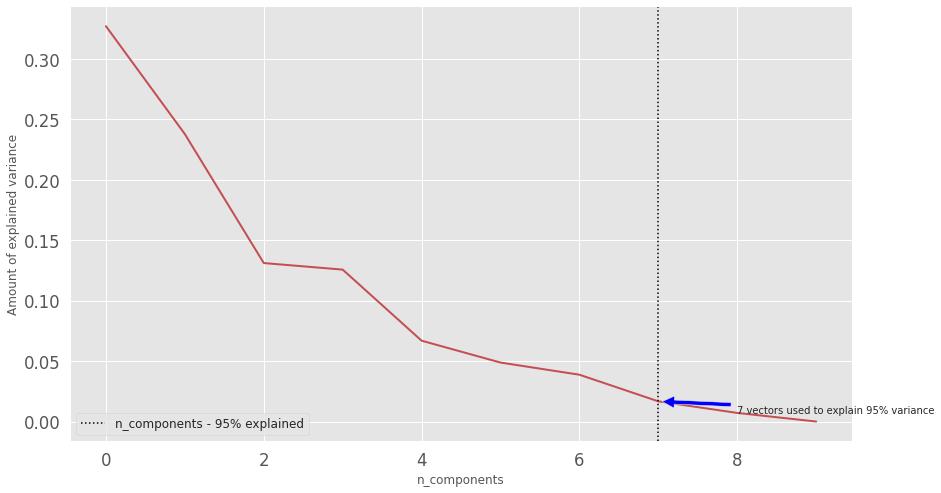

In [598]:
# Tryng with Dimentionality reduction and the Kmeans
n_components = numeric_data.shape[1]

# Running PCA with all the components
pca = PCA(n_components=n_components, random_state=42)
df_fit = pca.fit(X).transform(X)

# Calculating the 95% variance
total_variance = sum(pca.explained_variance_) # variance of all components
print("Total variance in dataset is:", total_variance)
var_95 = total_variance * 0.95 # times 0.95 to have the 95% 
print("the 95% variance we want to have iss:", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# tryng to hit 95%
print("variance explained with 10 components:", sum(a["Explained Variance"][0:10]))
print("variance explained with 9 components:", sum(a["Explained Variance"][0:9]))
print("variance explained with 8 components:", sum(a["Explained Variance"][0:8]))
print("variance explained with 7 components:", sum(a["Explained Variance"][0:7]))
print("variance explained with 6 components:", sum(a["Explained Variance"][0:6]))
print("variance explained with 5 components:", sum(a["Explained Variance"][0:5]))
print("variance explained with 4 components:", sum(a["Explained Variance"][0:4]))
print("variance explained with 3 components:", sum(a["Explained Variance"][0:3]))
print("variance explained with 2 components:", sum(a["Explained Variance"][0:2]))
print("variance explained with 1 components:", sum(a["Explained Variance"][0:1]))


# ploting the Data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('Amount of explained variance')

# plotting line with 95% e.v
plt.axvline(7,linestyle=':', label='n_components - 95% explained', c='black')
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('7 vectors used to explain 95% variance', xy=(7, pca.explained_variance_ratio_[7]), xytext=(8, pca.explained_variance_ratio_[8]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

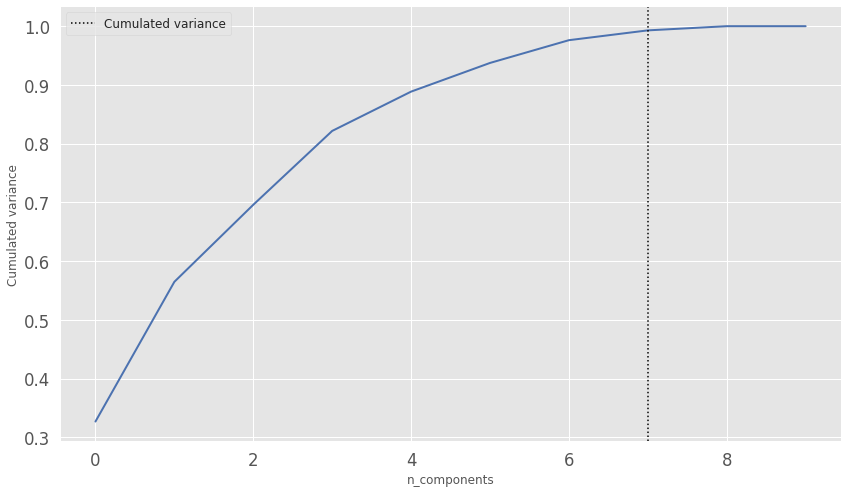

In [565]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i]) # PVE
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

plt.figure(1, figsize=(14,8))
plt.plot(cum_explained_var, linewidth=2, c="b")
plt.xlabel('n_components')
plt.ylabel('Cumulated variance')

# plotting line with 95% e.v
plt.axvline(7,linestyle=':', label='Cumulated variance', c='black')
plt.legend(prop=dict(size=12))

plt.show()

La indertia pour: 2 Clusters est: 16980.755006160463
La indertia pour: 3 Clusters est: 13751.744272265176
La indertia pour: 4 Clusters est: 11655.905087324858
La indertia pour: 5 Clusters est: 10169.684445812854
La indertia pour: 6 Clusters est: 8920.360382194594
La indertia pour: 7 Clusters est: 8120.517327082192
La indertia pour: 8 Clusters est: 7481.829878129412
La indertia pour: 9 Clusters est: 7075.051403045563
La indertia pour: 10 Clusters est: 6674.511248067435
La indertia pour: 11 Clusters est: 6318.071977293442
La indertia pour: 12 Clusters est: 5989.023421492895
La indertia pour: 13 Clusters est: 5669.409218258497
La indertia pour: 14 Clusters est: 5422.637635666317
La indertia pour: 15 Clusters est: 5191.972427513012
La indertia pour: 16 Clusters est: 4984.58970697384
La indertia pour: 17 Clusters est: 4798.839234312548
La indertia pour: 18 Clusters est: 4629.486210070582
La indertia pour: 19 Clusters est: 4516.212115440734


Text(0.5, 1.0, 'Inertia Plot per k')

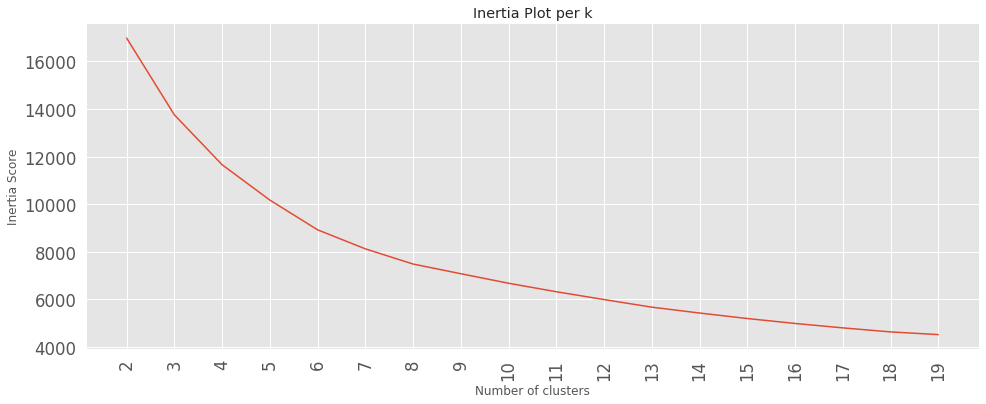

In [566]:
# relancer ACP avec 7 composants, et après relancer K-means, pour voire si on est arrivé a améliorer les résultats

pca = PCA(n_components=7, random_state = 42)
X_r = pca.fit(X).transform(X)

inertia = []

for f in num_of_clusters:
    kmeans = KMeans (n_clusters=f, random_state=42).fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("La indertia pour:", f, "Clusters est:", u)

# scree plot pour Inertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(num_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(num_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per k')

Conclusion : Nous avons réussi a améliorer la inertie de notre modèle pour 5 clusters.

# Analyse explicative avec l'ANOVA (ANalyse Of VAriance)

In [567]:
import scipy.stats as stats

In [568]:
# rename my column because the model doesn't work
df_anova.rename(columns = {'nutrition-score-fr_100g':'nutrition_score_fr_100g'}, inplace = True)

In [569]:
df_anova.head(2)

nutrition_grade_fr          pnns_groups_1 pnns_groups_2  \
20776                  a  fruits and vegetables    Vegetables   
20832                  a  fruits and vegetables    Vegetables   

       carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776               0.030    0.050000                         0.75   
20832               0.034    0.044444                         0.22   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
20776         0.88                 0.0        0.000       0.043636   0.005556   
20832         0.21                 0.0        0.031       0.043636   0.005556   

       sodium_100g  nutrition_score_fr_100g  
20776     0.005556                  0.16129  
20832     0.005556                  0.16129

In [570]:
# sns.pairplot(df_anova.sample(frac=0.05), hue="nutrition-score-fr_100g");

On peut déjà regarder les relations linéaires entre certaines variables.

In [571]:
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
             }

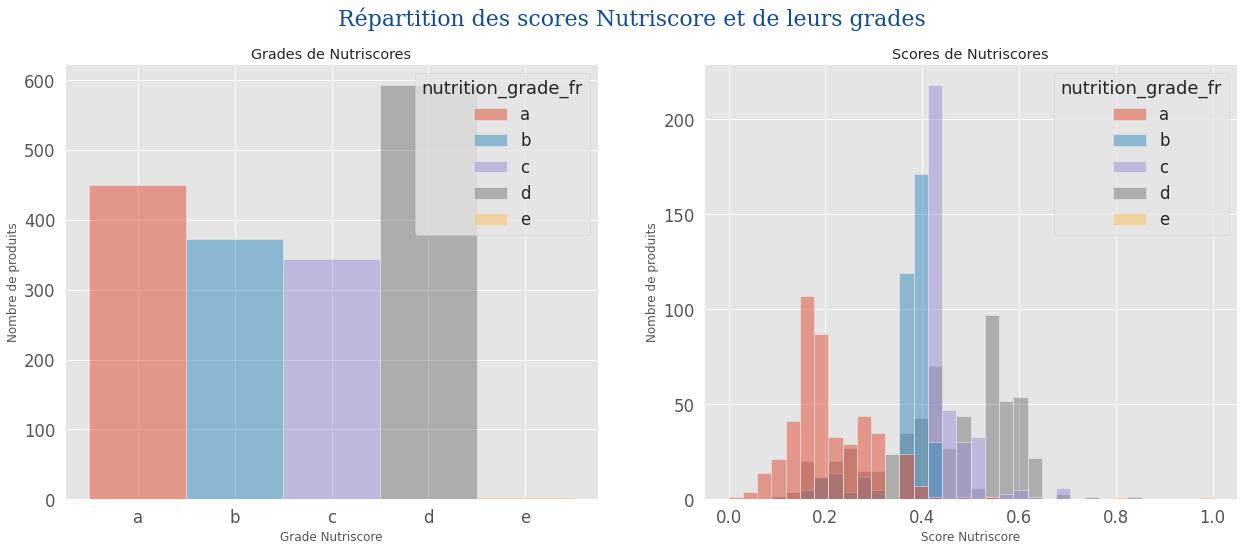

In [572]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(21,8))
fig.suptitle(r"Répartition des scores Nutriscore et de leurs grades" "\n", fontdict=font_title, fontsize=22)

sns.histplot(data=df_anova.sort_values("nutrition_grade_fr"), x="nutrition_grade_fr", hue="nutrition_grade_fr", ax=axes[0])
axes[0].set_title('Grades de Nutriscores')
axes[0].set_xlabel("Grade Nutriscore")
axes[0].set_ylabel("Nombre de produits")

sns.histplot(data=df_anova.sort_values("nutrition_grade_fr"), x="nutrition_score_fr_100g", hue="nutrition_grade_fr", ax=axes[1])
axes[1].set_title('Scores de Nutriscores')
axes[1].set_xlabel("Score Nutriscore")
axes[1].set_ylabel("Nombre de produits")

plt.show()

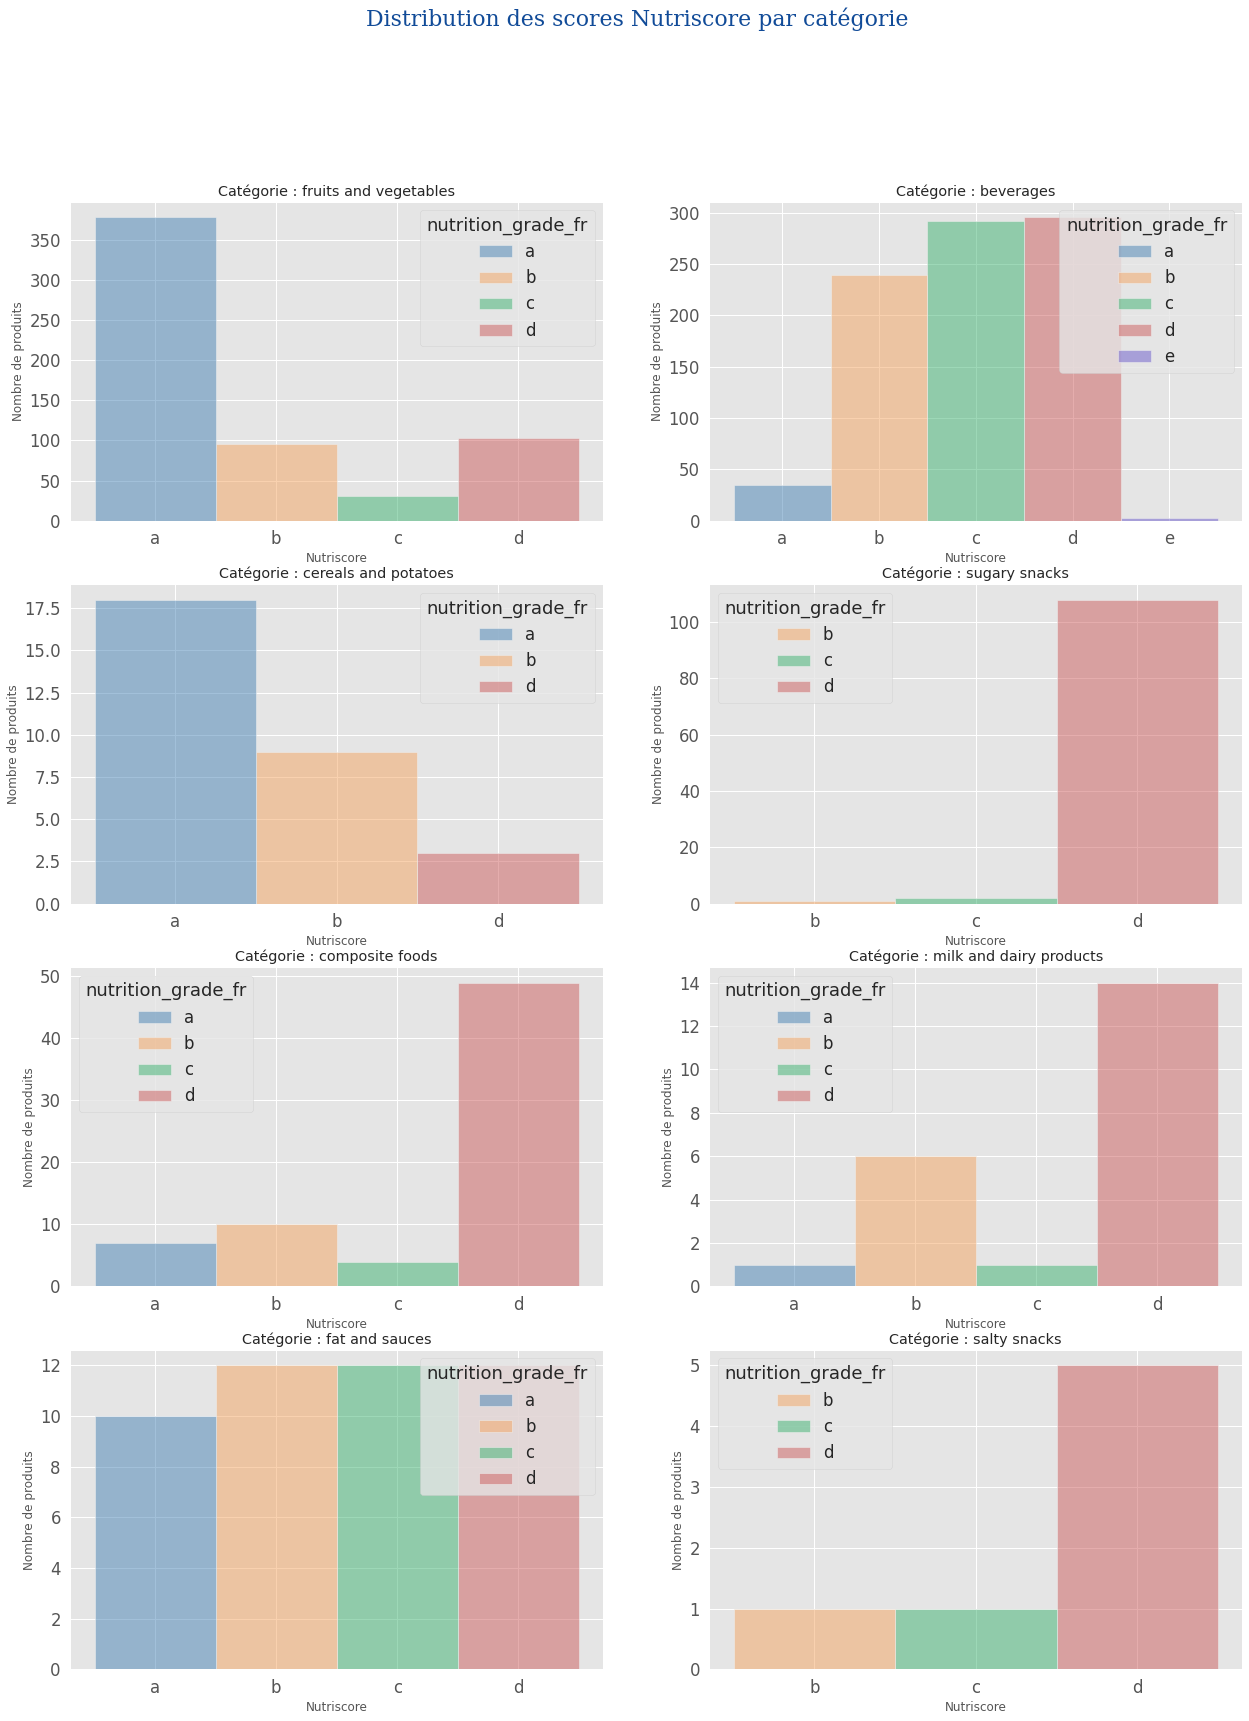

In [573]:
n_sub = len(df_anova['pnns_groups_1'].unique())
n_col = 2
palette = {'a':'steelblue','b':'sandybrown', 'c':'mediumseagreen', 'd':'indianred', 'e':'slateblue'}
fig, axes = plt.subplots(int(n_sub/n_col), n_col, sharex=False, sharey=False, figsize=(21,int(3*n_sub)))
axes = np.array(axes)
fig.suptitle("Distribution des scores Nutriscore par catégorie", fontdict=font_title, fontsize=22)
i=0
for ax in axes.reshape(-1):
    cat = df_anova['pnns_groups_1'].unique()[i]
    subset = df_anova[df_anova['pnns_groups_1']==cat].sort_values("nutrition_grade_fr")
    sns.histplot(data=subset, x="nutrition_grade_fr", hue="nutrition_grade_fr", palette=palette, ax=ax)
    ax.set_title('Catégorie : {}'.format(cat))
    ax.set_xlabel("Nutriscore")
    ax.set_ylabel("Nombre de produits")
    i+=1
plt.show()

Afin de vérifier si la catégorie pnns_groups_1 ou pnns_groups_2 influence rééllement le Nutriscore, nous pouvons réaliser une **ANOVA (Analyse de la variance)**. Le choix de ce test est dû au fait que nous étudions 1 variable qualitative (avec plus des 2 cathegories) comparativement à une variable quantitative.

Les hypothèses posées seront donc les suivantes :

**H0** : Les moyennes des groupes sont égales (pas de variation des moyennes des groupes et donc la catégorie n'a aucune influence sur le Nutriscore).

**H1** : Au moins, une moyenne de groupe est différente des autres groupes.

# Appliquer le ANOVA pnns_groups_1

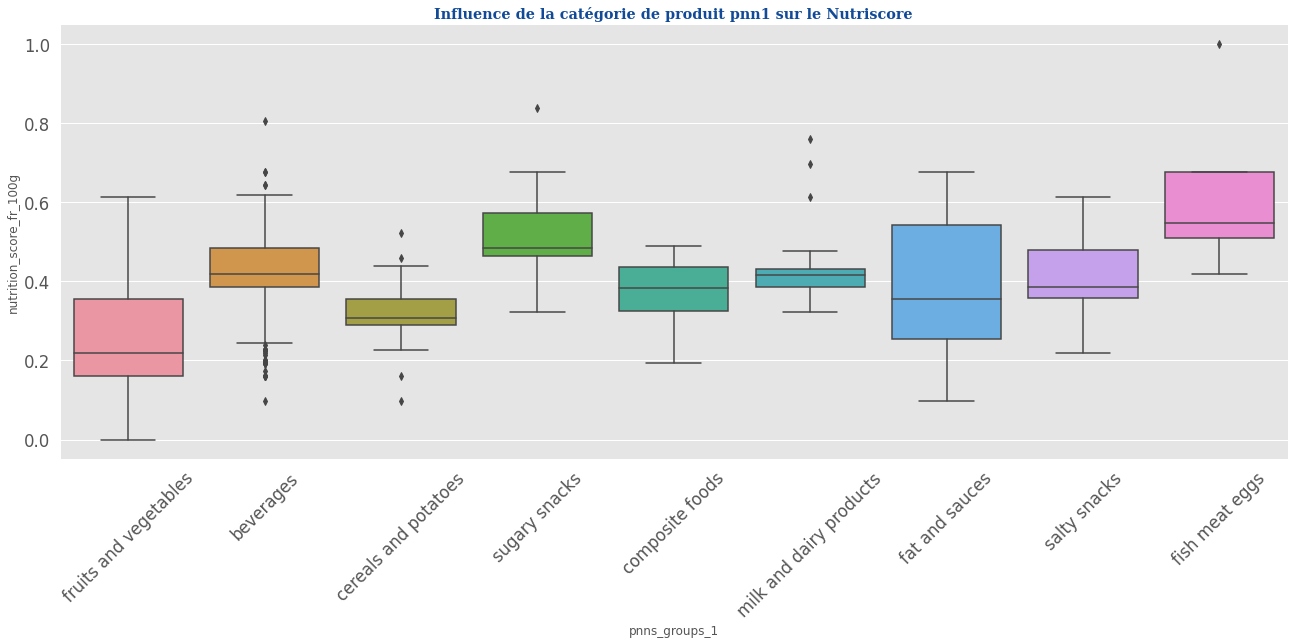

In [574]:
fig = plt.figure(figsize=(22,8))
ax = sns.boxplot(data=df_anova, x="pnns_groups_1", y="nutrition_score_fr_100g")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("Influence de la catégorie de produit pnn1 sur le Nutriscore", fontdict=font_title)
plt.show()

In [575]:
plt.figure(figsize=(20,5))
sns.barplot(x= df_anova['pnns_groups_1'], y=df_anova['nutrition_score_fr_100g'], estimator=np.median);

In [576]:
plt.figure(figsize=(20,5))
sns.barplot(x= df_anova['pnns_groups_1'], y=df_anova['nutrition_score_fr_100g'], estimator=np.median ,ci='sd'); 

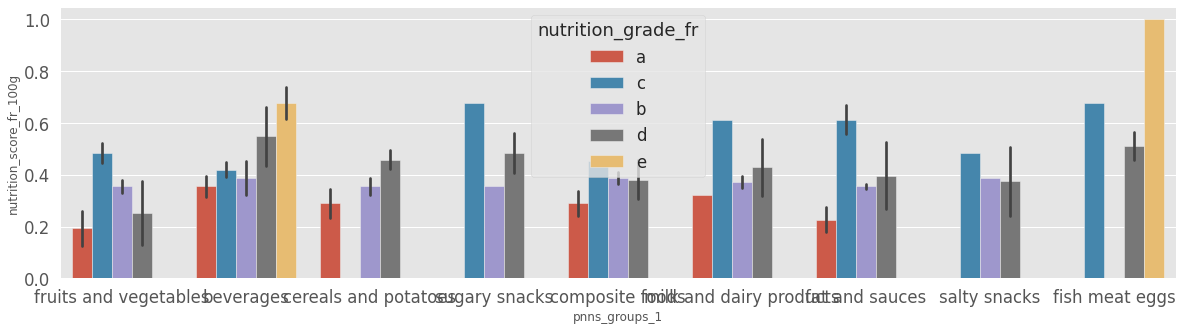

In [577]:
plt.figure(figsize=(20,5))
sns.barplot(x= df_anova['pnns_groups_1'], y=df_anova['nutrition_score_fr_100g'], hue=df_anova['nutrition_grade_fr'], estimator=np.median ,ci='sd'); 

In [578]:
# ANOVA pnn_1
from scipy import stats

groups = df_anova['pnns_groups_1'].unique()
group_labels = []

for g in groups:
    group_labels.append(df_anova[df_anova.pnns_groups_1 == g] ['nutrition_score_fr_100g'])
    
# How to calculate ANOVA results
F, f_p = stats.f_oneway(*group_labels)

print('F: ' + str(round(F, 4)))
print('p: ' + str(round(f_p, 4)))


F: 164.5331
p: 0.0


There is are no t-test inferior to the treshold H0 is valid:
 F: 68.0602
 p:4.840347470780667e-207



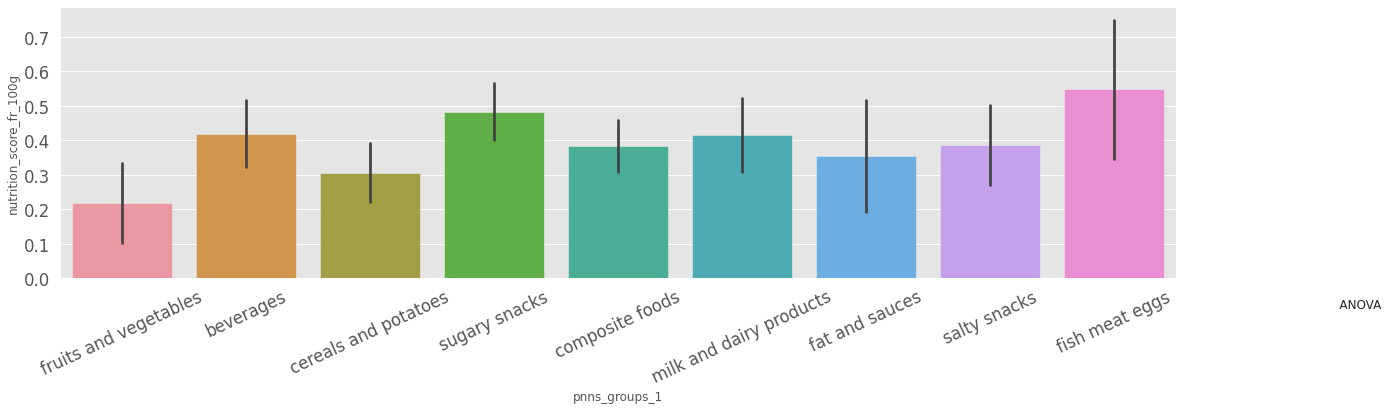

In [595]:
from statsmodels.stats.weightstats import ttest_ind

e_pnn_1 = df_anova['pnns_groups_1'].unique()
ttest = []

for i, e in enumerate(e_pnn_1):
#     print(i, e, end='')
    for i2, e2 in enumerate(e_pnn_1):
#         print( e, e2)
        if i2 > i:
            g1 = df_anova[df_anova.pnns_groups_1 == e]['nutrition_score_fr_100g']
            g2 = df_anova[df_anova.pnns_groups_1 == e2]['nutrition_score_fr_100g']
            t, p = stats.ttest_ind(g1, g2)
            
            
            ttest.append([f'{e} - {e2}:', t.round(4), p.round(4)])
#             print([f'{e} - {e2}:', t.round(4),p.round(4)])

textstr = f'     ANOVA\n'
textstr == f'F: {F.round(4)}\n'
textstr == f'p: {f_p}\n'

treshold = 0.05 / len(ttest)       
for t in ttest:
    if t[2] <= treshold:
        textstr == f'{t[0]} {t[1]} {t[2]}\n'
    else:
#         print(f'F: {f}\n p:{f_p}\n')
        print(f'There is are no t-test inferior to the treshold H0 is valid:\n F: {F.round(4)}\n p:{f_p}\n')
        break
        
fig = plt.figure(figsize=(20,5))
fig = sns.barplot(x= df_anova['pnns_groups_1'], y=df_anova['nutrition_score_fr_100g'], estimator=np.median ,ci='sd');
fig.set_xticklabels(fig.get_xticklabels(), rotation=25);
plt.text(1, 0, textstr, fontsize=12, transform=plt.gcf().transFigure);

In [580]:
# apply ANOVA model pnns_groups_1
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

model_1 = smf.ols('nutrition_score_fr_100g ~ pnns_groups_1',data = df_anova).fit()

print(model_1.summary())

anova_result_1 = sm.stats.anova_lm(model_1, test="F", type="1")
anova_result_1

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.429
Model:                                 OLS   Adj. R-squared:                  0.426
Method:                      Least Squares   F-statistic:                     164.5
Date:                     Mon, 05 Dec 2022   Prob (F-statistic):          4.84e-207
Time:                             12:17:49   Log-Likelihood:                 1473.3
No. Observations:                     1764   AIC:                            -2929.
Df Residuals:                         1755   BIC:                            -2879.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

df     sum_sq   mean_sq           F         PR(>F)
pnns_groups_1     8.0  14.576099  1.822012  164.533112  4.840347e-207
Residual       1755.0  19.434579  0.011074         NaN            NaN

Le résultat le plus important est le PR. Il s'agit de la valeur p (également connue sous le nom de signification). La valeur de p < 0,05. Donc ont rejecte la hipotese nulle, et concluons que le pnn a une influence sur le nutriscore.

In [581]:
!pip install bioinfokit

In [582]:
# Not our case Lorsque l'ANOVA est significative, des tests post hoc sont utilisés pour voir les différences entre des groupes spécifiques (valeur critique (test HSD de Tukey).
from bioinfokit.analys import stat

res_1 = stat()
res_1.tukey_hsd(df=df_anova, res_var='nutrition_score_fr_100g', xfac_var='pnns_groups_1', anova_model='nutrition_score_fr_100g ~ pnns_groups_1')

res_1.tukey_summary

group1                   group2      Diff     Lower  \
0     fruits and vegetables                beverages  0.176841  0.159545   
1     fruits and vegetables     cereals and potatoes  0.074222  0.013100   
2     fruits and vegetables            sugary snacks  0.269398  0.235665   
3     fruits and vegetables          composite foods  0.125804  0.084555   
4     fruits and vegetables  milk and dairy products  0.191719  0.120793   
5     fruits and vegetables           fat and sauces  0.144021  0.094045   
6     fruits and vegetables             salty snacks  0.163316  0.039083   
7     fruits and vegetables           fish meat eggs  0.380458  0.233704   
8                 beverages     cereals and potatoes  0.102619  0.041926   
9                 beverages            sugary snacks  0.092557  0.059607   
10                beverages          composite foods  0.051037  0.010426   
11                beverages  milk and dairy products  0.014878 -0.055679   
12                beverages           fat and sauces  0.032820 -0.016630   
13                beverages             salty snacks  0.013525 -0.110497   
14                beverages           fish meat eggs  0.203617  0.057041   
15     cereals and potatoes            sugary snacks  0.195176  0.127927   
16     cereals and potatoes          composite foods  0.051582 -0.019734   
17     cereals and potatoes  milk and dairy products  0.117498  0.025764   
18     cereals and potatoes           fat and sauces  0.069799 -0.006896   
19     cereals and potatoes             salty snacks  0.089094 -0.048086   
20     cereals and potatoes           fish meat eggs  0.306237  0.148371   
21            sugary snacks          composite foods  0.143594  0.093714   
22            sugary snacks  milk and dairy products  0.077678  0.001409   
23            sugary snacks           fat and sauces  0.125377  0.068070   
24            sugary snacks             salty snacks  0.106082 -0.021277   
25            sugary snacks           fish meat eggs  0.111061 -0.038350   
26          composite foods  milk and dairy products  0.065915 -0.013964   
27          composite foods           fat and sauces  0.018217 -0.043813   
28          composite foods             salty snacks  0.037512 -0.092041   
29          composite foods           fish meat eggs  0.254654  0.103370   
30  milk and dairy products           fat and sauces  0.047699 -0.037017   
31  milk and dairy products             salty snacks  0.028404 -0.113416   
32  milk and dairy products           fish meat eggs  0.188739  0.026825   
33           fat and sauces             salty snacks  0.019295 -0.113295   
34           fat and sauces           fish meat eggs  0.236438  0.082544   
35             salty snacks           fish meat eggs  0.217143  0.025781   

       Upper    q-value   p-value  
0   0.194137  44.906322  0.001000  
1   0.135344   5.333347  0.005258  
2   0.303130  35.075886  0.001000  
3   0.167053  13.395116  0.001000  
4   0.262645  11.872028  0.001000  
5   0.193996  12.657067  0.001000  
6   0.287548   5.773734  0.001532  
7   0.527213  11.386224  0.001000  
8   0.163313   7.425944  0.001000  
9   0.125507  12.337245  0.001000  
10  0.091648   5.519534  0.003166  
11  0.085436   0.926145  0.900000  
12  0.082271   2.914977  0.500166  
13  0.137548   0.478980  0.900000  
14  0.350194   6.101186  0.001000  
15  0.262425  12.746900  0.001000  
16  0.122899   3.176694  0.377831  
17  0.209231   5.625552  0.002347  
18  0.146494   3.997125  0.108557  
19  0.226273   2.852475  0.526943  
20  0.464102   8.519903  0.001000  
21  0.193474  12.643648  0.001000  
22  0.153948   4.473140  0.042155  
23  0.182684   9.608905  0.001000  
24  0.233441   3.658286  0.192599  
25  0.260471   3.264706  0.337603  
26  0.145794   3.624258  0.203213  
27  0.080246   1.289843  0.900000  
28  0.167064   1.271696  0.900000  
29  0.405939   7.392997  0.001000  
30  0.132414   2.472904  0.689557  
31  0.170224   0.879639  0.900000  
32  0.350653   5.119

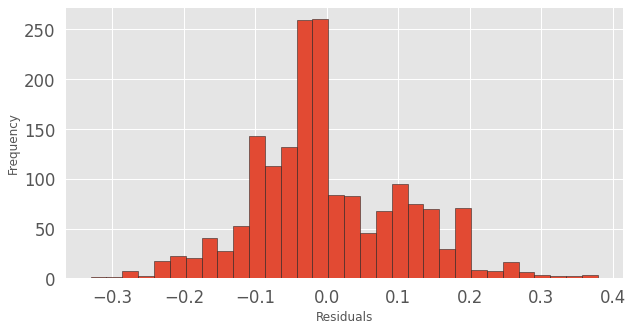

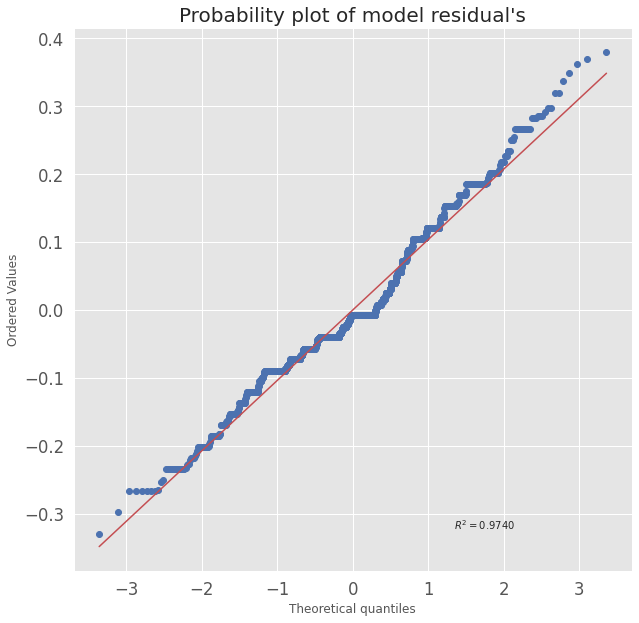

In [583]:
# Plot the resuts 
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 5))
ax = fig.add_subplot(111)

# histogram
plt.hist(res_1.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Plot the resuts 
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10 , 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model_1.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

# Appliquer le ANOVA pnns_groups_2

In [584]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_anova, x="pnns_groups_2", y="nutrition_score_fr_100g")
plt.setp(ax.get_xticklabels(), rotation=75)
plt.title("Influence de la catégorie de produit pnn2 sur le Nutriscore", fontdict=font_title)
plt.show()

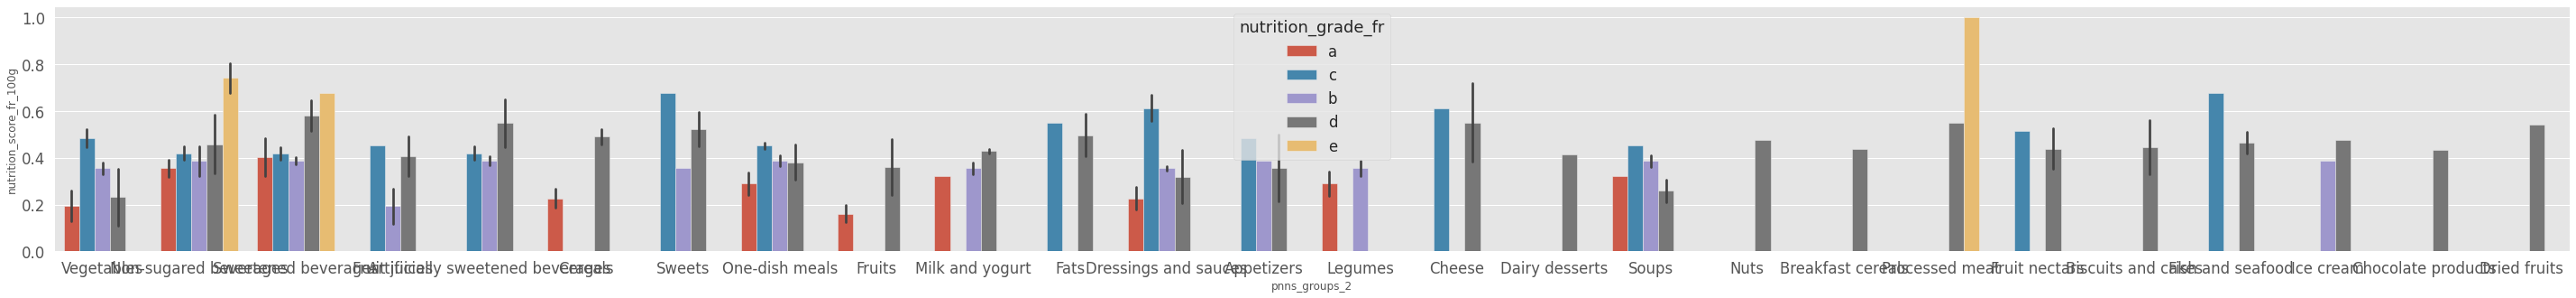

In [585]:
plt.figure(figsize=(50,5))
sns.barplot(x= df_anova['pnns_groups_2'], y=df_anova['nutrition_score_fr_100g'], hue=df_anova['nutrition_grade_fr'], estimator=np.median ,ci='sd'); 

In [586]:
df_anova.head(2)

nutrition_grade_fr          pnns_groups_1 pnns_groups_2  \
20776                  a  fruits and vegetables    Vegetables   
20832                  a  fruits and vegetables    Vegetables   

       carbohydrates_100g  fiber_100g  fruits-vegetables-nuts_100g  \
20776               0.030    0.050000                         0.75   
20832               0.034    0.044444                         0.22   

       energy_100g  saturated-fat_100g  sugars_100g  proteins_100g  salt_100g  \
20776         0.88                 0.0        0.000       0.043636   0.005556   
20832         0.21                 0.0        0.031       0.043636   0.005556   

       sodium_100g  nutrition_score_fr_100g  
20776     0.005556                  0.16129  
20832     0.005556                  0.16129

In [587]:
# apply ANOVA model pnns_groups_1
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

model_2 = smf.ols('nutrition_score_fr_100g ~ pnns_groups_2',data = df_anova).fit()

print(model_2.summary())

#apply ANOVA stats pnns_groups_2
anova_result_2 = sm.stats.anova_lm(model_2, test="F", type="1")
anova_result_2

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.495
Model:                                 OLS   Adj. R-squared:                  0.487
Method:                      Least Squares   F-statistic:                     68.06
Date:                     Mon, 05 Dec 2022   Prob (F-statistic):          3.78e-236
Time:                             12:18:03   Log-Likelihood:                 1581.8
No. Observations:                     1764   AIC:                            -3112.
Df Residuals:                         1738   BIC:                            -2969.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

df     sum_sq   mean_sq          F         PR(>F)
pnns_groups_2    25.0  16.824900  0.672996  68.060173  3.779064e-236
Residual       1738.0  17.185779  0.009888        NaN            NaN

Le résultat le plus important est le PR. Il s'agit de la valeur p (également connue sous le nom de signification). La valeur de p est de 3.779064e-236. Donc ont accept la hippotese alternative et le Nutriscore a une influence sur le PNN. 

In [588]:
#  !pip install bioinfokit

In [589]:
#Adhoc test to confirm the results
from bioinfokit.analys import stat

res_2 = stat()
res_2.tukey_hsd(df=df_anova, res_var='nutrition_score_fr_100g', xfac_var='pnns_groups_2', anova_model='nutrition_score_fr_100g ~ pnns_groups_2')

res_2.tukey_summary

group1                            group2      Diff     Lower  \
0            Vegetables             Non-sugared beverages  0.166502  0.144408   
1            Vegetables               Sweetened beverages  0.265197  0.230134   
2            Vegetables                      Fruit juices  0.051855 -0.019052   
3            Vegetables  Artificially sweetened beverages  0.180400  0.146873   
4            Vegetables                           Cereals  0.080011 -0.084527   
..                  ...                               ...       ...       ...   
320    Fish and seafood                Chocolate products  0.103226 -0.319759   
321    Fish and seafood                      Dried fruits  0.006452 -0.416533   
322           Ice cream                Chocolate products  0.000000 -0.448643   
323           Ice cream                      Dried fruits  0.109677 -0.338966   
324  Chocolate products                      Dried fruits  0.109677 -0.408371   

        Upper    q-value   p-value  
0    0.188595  39.261354  0.001000  
1    0.300259  39.403321  0.001000  
2    0.122762   3.809857  0.550978  
3    0.213927  28.031761  0.001000  
4    0.244550   2.533350  0.900000  
..        ...        ...       ...  
320  0.526210   1.271377  0.900000  
321  0.429436   0.079461  0.900000  
322  0.448643   0.000000  0.900000  
323  0.558320   1.273582  0.900000  
324  0.627726   1.102954  0.900000  

[325 rows x 7 columns]

In [590]:
# ANOVA pnn_2
from scipy import stats

groups = df_anova['pnns_groups_2'].unique()
group_labels = []

for g in groups:
    group_labels.append(df_anova[df_anova.pnns_groups_2 == g] ['nutrition_score_fr_100g'])
    
# How to calculate ANOVA results
F, f_p2 = stats.f_oneway(*group_labels)

print('F: ' + str(round(F, 4)))
print('p: ' + str(round(f_p2, 4)))

F: 68.0602
p: 0.0


In [594]:
from statsmodels.stats.weightstats import ttest_ind

e_pnn_1 = df_anova['pnns_groups_2'].unique()
ttest = []

for i, e in enumerate(e_pnn_1):
#     print(i, e, end='')
    for i2, e2 in enumerate(e_pnn_1):
#         print( e, e2)
        if i2 > i:
            g1 = df_anova[df_anova.pnns_groups_2 == e]['nutrition_score_fr_100g']
            g2 = df_anova[df_anova.pnns_groups_2 == e2]['nutrition_score_fr_100g']
            t, p = stats.ttest_ind(g1, g2)
            
            
            ttest.append([f'{e} - {e2}:', t.round(4), p.round(4)])
#             print([f'{e} - {e2}:', t.round(4),p.round(4)])

textstr = f'     ANOVA\n'
textstr == f'F: {F.round(4)}\n'
textstr == f'p: {f_p2.round(4)}\n'

treshold = 0.05 / len(ttest)       
for t in ttest:
    if t[2] <= treshold:
        textstr == f'{t[0]} {t[1]} {t[2]}\n'
    else:
#         print(f'F: {f}\n p:{f_p}\n')
        print(f'There is are no t-test inferior to the treshold, H0 is valid\n F: {F.round(4)}\n p:{f_p2}\n')
        break
        
fig = plt.figure(figsize=(50,5))
fig = sns.barplot(x= df_anova['pnns_groups_2'], y=df_anova['nutrition_score_fr_100g'], hue=df_anova['nutrition_grade_fr'], estimator=np.median ,ci='sd');
fig.set_xticklabels(fig.get_xticklabels(), rotation=25);
plt.text(1, 0, textstr, fontsize=12, transform=plt.gcf().transFigure);

There is are no t-test inferior to the treshold, H0 is valid
 F: 68.0602
 p:3.779063964843092e-236



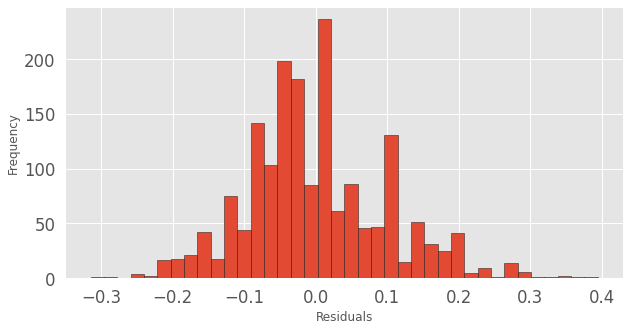

0.9739564657211304 2.3049725258480038e-17


In [592]:
# Plot the resuts 
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 5))
ax = fig.add_subplot(111)

# histogram
plt.hist(res_2.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Plot the resuts 
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10 , 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model_2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set
plt.show()

# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res_1.anova_model_out.resid)
print(w, pvalue)

Dans l'histogramme, la distribution semble approximativement normale et suggère que les résidus ont une distribution approximativement normale.

Le test de Shapito-Wilk peut être utilisé pour vérifier la distribution normale des résidus. Hypothèse nulle : les données sont tirées de la distribution normale.

Comme le p est significatif, nous rejetons les hypothèses nulles et concluons que les données ne sont pas tirées de la distribution normale. 